# Climate resilience requires equitable access to quality green energy

jobs. The City of Saint Paul is at the forefront.

Elham Ali (Beeck Center for Social Impact and Innovation at Georgetown University)  
September 19, 2024

Minnesota, particularly the City of Saint Paul, has seen a surge in climate resilience funding aimed at expanding green energy job opportunities. However, BIPOC communities remain underrepresented in these jobs and disproportionately suffer from the adverse effects of human-driven climate change.

## Background

This analysis looks at access to green energy jobs (like energy efficiency, renewable energy, and green construction) by race/ethnicity, gender, education, and income in St. Paul, Minnesota, USA.

## Questions

Here are some of the questions I will explore using different datasets:

-   How much climate resilience funding has St. Paul received?
-   What specific green jobs are being created in St. Paul (e.g., energy efficiency, renewable energy, green construction)?
-   What is the quality of these jobs? How much do they pay? What qualifications are needed (education and experience)?
-   Who is getting these jobs, based on education, race/ethnicity, gender, and income levels?

## Data Sources

The data for this project comes from:

-   The National Center for O\*NET Development
-   2023 Occupational Employment and Wage Survey
-   Urban Institute 11 elements of job quality: Clean Energy Job Quality and Education Data
-   National and local demographic data from the 2022 American Community Survey Public Use Microdata Sample (ACS PUMS)
-   US Census Bureau’s 2023 QuickFacts tool
-   Invest.gov
-   Geocorr from the Missouri Census Data Center

I will reduce each large dataset to focus only on questions related to green jobs and job quality. Please note that some datasets have already been pre-processed in Python with specific filters applied. We can find the original raw datasets in the data folder for reference.

## Analysis

I will look at each question one by one and clean the data as I go. Some datasets might need to be combined, so I will organize the data during the analysis before exploring the results.

### Load packages and libraries

In [ ]:
## For folder structure
library(here)

here() starts at /Users/elhamali/Documents/Data Projects/climate-equity-workforce

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: 'rlang'

The following objects are masked from 'package:purrr':

    %@%, flatten, flatten_chr, flatten_dbl, flatten_int, flatten_lgl,
    flatten_raw, invoke, splice

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Highcharts (www.highcharts.com) is a Highsoft software product which is
not free for commercial and Governmental use


Attaching package: 'igraph'

The following object is masked from 'package:rlang':

    is_named

The following objects are masked from 'package:lubridate':

    %--%, union

The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union

The following objects are masked from 'package:purrr':

    compose, simplify

The following object is masked from 'package:tidyr':

    crossing

The following object is masked from 'package:tibble':

    as_data_frame

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union

### 1. Climate Resilience Funding for St. Paul

> **RQ 1: How much climate resilience funding has the City of Saint Paul received?**
>
> As of June 2024, **Minnesota** received a total of \$7,101,423,527 in funding for climate resilience, while **St. Paul** received \$446,286,762. Specifically, as of January 2024, St. Paul has secured \$433,028,012 from the Bipartisan Infrastructure Law (BIL) and \$13,258,750 from the Inflation Reduction Act (IRA) for **climate resilience efforts.**
>
> St. Paul’s funding makes up **6.28%** of Minnesota’s total climate resilience funding. Nearly **95% of St. Paul’s funding i**s allocated to **transportation** **projects**, with clean energy, buildings, and manufacturing receiving **less than 2% of the total**. It’s like filling up a swimming pool with water but using only a small 8 oz glass for clean energy, buildings, and manufacturing.
>
> As of January 2024, St. Paul received **\$8,337,843 from the BIL** and **\$200,000 from the IRA** specifically for investments in clean energy, buildings, and manufacturing.

In [ ]:
# Import data
funding <- read_csv(here("processed_data", "FundingSummary.csv"))

e.g.:
  dat <- vroom(...)
  problems(dat)

Rows: 49535 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): Agency Name, Bureau Name, Program Name, Category, Subcategory, Pro...
dbl  (1): Unique ID

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

In [ ]:
### Convert the `Funding Amount` to numeric and handling commas in the values

funding <- funding %>%
  mutate(`Funding Amount` = as.numeric(gsub(",", "", `Funding Amount`)))

ℹ In argument: `Funding Amount = as.numeric(gsub(",", "", `Funding Amount`))`.
Caused by warning:
! NAs introduced by coercion

#### Filter for MN State and City of St. Paul

First, I will filter the dataset by State: **Minnesota**, and then narrow it down further to focus on the **City of St. Paul** and the surrounding region. Please note that St. Paul is part of the **Minneapolis-St. Paul-Bloomington, MN-WI** region, so I’ll ensure it’s included within that larger metropolitan area.

In [ ]:
# Filter for Minnesota funding
minnesota_funding <- funding %>%
  filter(State == "Minnesota")

saveRDS(minnesota_funding, here("processed_data", "minnesota_funding.rds"))

In [ ]:
# Further filter for St. Paul, considering variations in city names
st_paul_funding <- minnesota_funding %>%
  filter(str_detect(City, regex("Saint Paul|St. Paul|South St. Paul|Minneapolis--St. Paul|Minneapolis-St. Paul", ignore_case = TRUE)))

saveRDS(st_paul_funding, here("processed_data", "st_paul_funding.rds"))

# glimpse(st_paul_funding)

#### Calculate funding for MN State and City of St. Paul

In [ ]:
# Set options to avoid scientific notation
options(scipen = 999)

# Load Minnesota and St. Paul data
minnesota_funding <- readRDS(here("processed_data", "minnesota_funding.rds"))
st_paul_funding <- readRDS(here("processed_data", "st_paul_funding.rds"))

# Calculate total funding for Minnesota
total_minnesota_funding <- minnesota_funding %>%
  summarise(total_funding = sum(`Funding Amount`, na.rm = TRUE))

cat("The total amount of funding Minnesota received for climate as of June 2024 is $", 
    format(total_minnesota_funding$total_funding, big.mark = ","), "\n")

The total amount of funding Minnesota received for climate as of June 2024 is $ 7,101,423,527 

The total amount of funding St. Paul received for climate as of June 2024 is $ 446,286,762 

As of January 2024, St. Paul has been allocated $ 433,028,012  from the Bipartisan Infrastructure Law (BIL) and $ 13,258,750  from the Inflation Reduction Act (IRA).

The total amount of funding St. Paul received for 'Clean Energy, Buildings, and Manufacturing' as of June 2024 is $ 8,537,843 

As of January 2024, St. Paul has been allocated $ 8,337,843  from the Bipartisan Infrastructure Law (BIL) and $ 200,000  from the Inflation Reduction Act (IRA) to invest in 'Clean Energy, Buildings, and Manufacturing'.

As of January 2024, St. Paul has been allocated \$ 433,028,012 million from the Bipartisan Infrastructure Law (BIL) and \$ 13,258,750 from the Inflation Reduction Act (IRA) to invest in climate resilience efforts in total.

As of January 2024, St. Paul has been allocated \$ 8,337,843 million from the Bipartisan Infrastructure Law (BIL) and \$ 200,000 from the Inflation Reduction Act (IRA) to invest in ‘Clean Energy, Buildings, and Manufacturing’.

#### Calculate fraction of St. Paul’s funding from MN’s

In [ ]:
minnesota_funding <- readRDS(here("processed_data", "minnesota_funding.rds"))
st_paul_funding <- readRDS(here("processed_data", "st_paul_funding.rds"))

# Calculate total funding for Minnesota
total_minnesota_funding <- minnesota_funding %>%
  summarise(total_funding = sum(`Funding Amount`, na.rm = TRUE)) %>%
  pull(total_funding)

# Calculate total funding for St. Paul
total_st_paul_funding <- st_paul_funding %>%
  summarise(total_funding = sum(`Funding Amount`, na.rm = TRUE)) %>%
  pull(total_funding)

# Calculate the fraction of St. Paul's funding from Minnesota's total funding
fraction_st_paul <- total_st_paul_funding / total_minnesota_funding

# Output the results
cat("The fraction of St. Paul's funding from Minnesota's total funding is: ", 
    round(fraction_st_paul, 4), "\n")

The fraction of St. Paul's funding from Minnesota's total funding is:  0.0628 

This means St. Paul's funding is 6.28 % of Minnesota's total funding.

#### Visualize categories of funding for St. Paul

In [ ]:
# Group the St. Paul data by Category and calculate the total funding for each category
st_paul_category_funding <- st_paul_funding %>%
  group_by(Category) %>%
  summarise(total_funding = sum(`Funding Amount`, na.rm = TRUE)) %>%
  arrange(desc(total_funding))

colors <- brewer.pal(n = length(unique(st_paul_category_funding$Category)), "Set3")

# Create an interactive bar chart using highcharter
hchart_bar <- highchart() %>%
  hc_chart(type = "bar") %>%
  hc_xAxis(categories = st_paul_category_funding$Category, title = list(text = "Category")) %>%
  hc_yAxis(title = list(text = "Total Funding ($)"), labels = list(format = "{value:,.0f}")) %>%
  hc_add_series(name = "Total Funding", 
                data = st_paul_category_funding$total_funding, 
                colorByPoint = TRUE, 
                colors = colors) %>%
  hc_title(text = "Total Funding by Category in St. Paul") %>%
  hc_tooltip(pointFormat = "Total Funding: ${point.y:,.0f}") %>%
  hc_exporting(
    enabled = TRUE,
    buttons = list(contextButton = list(menuItems = c("downloadPNG", "downloadJPEG", "downloadSVG", "downloadPDF")))
  )

# Saving the chart as an HTML file
saveWidget(hchart_bar, file = here("graphs", "st_paul_funding_bar.html"))

A quick glance tells us that almost **95%** of St. Paul’s funding goes to transportation efforts. Clean energy, buildings and manufacturing received less than **2%** of funding.

In [ ]:
# Create an interactive pie chart using highcharter
hchart_pie <- highchart() %>%
  hc_chart(type = "pie") %>%
  hc_add_series(name = "Total Funding", 
                data = list_parse2(st_paul_category_funding %>% 
                                   mutate(name = Category, y = total_funding)), 
                colors = colors) %>%
  hc_title(text = "Total Funding by Category in St. Paul") %>%
  hc_tooltip(pointFormat = "Total Funding: ${point.y:,.0f}") %>%
  hc_plotOptions(pie = list(innerSize = '50%', dataLabels = list(enabled = TRUE))) %>%
  hc_exporting(
    enabled = TRUE,
    buttons = list(contextButton = list(menuItems = c("downloadPNG", "downloadJPEG", "downloadSVG", "downloadPDF")))
  )

saveWidget(hchart_pie, file = here("graphs", "st_paul_funding_pie.html"))

In [ ]:
## Export the funding data to CSV for graphing
write.csv(minnesota_funding, here("processed_data", "minnesota_funding.csv"), row.names = FALSE)
write.csv(st_paul_funding, here("processed_data", "st_paul_funding.csv"), row.names = FALSE)

### 2. Types of Green Jobs in St. Paul

> **RQ 2: What specific green jobs are being created in the Minneapolis-Saint Paul metropolitan area and nationally (e.g., energy efficiency, renewable energy, green construction)?**
>
> <u>Nationally</u>
>
> There’s a total of **17,119,730 employed people** in green jobs nationally. Specifically, in **Energy Efficiency**, there are 4,928,520 (28.79 %), in **Green Construction** there are 10,624,140 (62.06 %), and in **Renewable Energy Generation** there are 1,567,070 (9.15 %).
>
> The **mean annual wage** for the occupation in U.S. dollars for green jobs is \$78,363.4, and for non-green jobs is \$73,763.67. That means green jobs pay **\$4,599.73 more** than non-green jobs **nationally**.
>
> The **mean hourly wage** for the occupation in U.S. dollars for green jobs is \$37.67547, and for non-green jobs is \$34.80. That means green jobs pay **\$2.88 more** than non-green jobs **nationally**.
>
> <u>Minneapolis-Saint Paul Metropolitan Area</u>
>
> There’s a total of **214,340 employed people** in green jobs in the Minneapolis-Saint Paul metropolitan area. Specifically, in **Energy Efficiency**, there are 66,410 ( 30.98 %), in **Green Construction** there are 124,680 ( 58.17 %), and in **Renewable Energy Generation** there are 23,250 ( 10.85 %).
>
> The **mean annual wage** for the occupation in U.S. dollars for green jobs **in this area** is \$84,561.7, and for non-green jobs is \$77,192.53. That means green jobs in Saint Paul pay \$7,369.169 more than non-green jobs in this area.
>
> The **mean hourly wage** for the occupation in U.S. dollars for green jobs **in this area** is \$40.65, and for non-green jobs is \$36.31. That means green jobs in Saint Paul pay **\$4.35 more** than non-green jobs in this area.

#### Green jobs nationally

In [ ]:
# Import national jobs data
national_jobs <- read_csv(here("processed_data", "OWES_and_ONET-National.csv"))

Rows: 1420 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (21): AREA_TITLE, PRIM_STATE, NAICS_TITLE, I_GROUP, OCC_CODE, OCC_TITLE,...
dbl  (7): AREA, AREA_TYPE, NAICS, OWN_CODE, TOT_EMP, EMP_PRSE, MEAN_PRSE
lgl  (6): JOBS_1000, LOC_QUOTIENT, PCT_TOTAL, PCT_RPT, ANNUAL, HOURLY

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Here, we’d want to filter to only green jobs

In [ ]:
# Convert necessary columns to numeric where needed
national_jobs <- national_jobs %>%
  mutate(
    TOT_EMP = as.numeric(TOT_EMP),
    # JOBS_1000 = as.numeric(JOBS_1000),
    # PCT_TOTAL = as.numeric(PCT_TOTAL),
    H_MEAN = as.numeric(H_MEAN),
    A_MEAN = as.numeric(A_MEAN),
    A_MEDIAN = as.numeric(A_MEDIAN),
    H_MEDIAN = as.numeric(H_MEDIAN)
  )

The first warning was:
ℹ In argument: `H_MEAN = as.numeric(H_MEAN)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3 remaining warnings.

# A tibble: 4 × 6
  `O*NET-SOC Sector`           TOT_EMP H_MEAN A_MEAN A_MEDIAN H_MEDIAN
  <chr>                          <dbl>  <dbl>  <dbl>    <dbl>    <dbl>
1 Energy Efficiency            4928520   43.0 89371     86355     41.5
2 Green Construction          10624140   33.9 70506.    60165     28.9
3 Renewable Energy Generation  1567070   42.3 88028.    97010     46.6
4 All                         17119730   37.7 78363.    67640     32.5

In [ ]:
# Calculate total employment and sector percentages
total_green_jobs <- final_summary %>% filter(`O*NET-SOC Sector` == "All") %>% pull(TOT_EMP)

energy_efficiency_jobs <- final_summary %>% filter(`O*NET-SOC Sector` == "Energy Efficiency") %>% pull(TOT_EMP)
green_construction_jobs <- final_summary %>% filter(`O*NET-SOC Sector` == "Green Construction") %>% pull(TOT_EMP)
renewable_energy_jobs <- final_summary %>% filter(`O*NET-SOC Sector` == "Renewable Energy Generation") %>% pull(TOT_EMP)

# Calculate the percentages
energy_efficiency_pct <- round((energy_efficiency_jobs / total_green_jobs) * 100, 2)
green_construction_pct <- round((green_construction_jobs / total_green_jobs) * 100, 2)
renewable_energy_pct <- round((renewable_energy_jobs / total_green_jobs) * 100, 2)

# Create the concatenated sentence
cat("There's a total of", format(total_green_jobs, big.mark = ",", scientific = FALSE), 
    "employed people in green jobs nationally. Specifically, in Energy Efficiency, there are", 
    format(energy_efficiency_jobs, big.mark = ",", scientific = FALSE), 
    "(", energy_efficiency_pct, "%), in Green Construction there are", 
    format(green_construction_jobs, big.mark = ",", scientific = FALSE), 
    "(", green_construction_pct, "%), and in Renewable Energy Generation there are", 
    format(renewable_energy_jobs, big.mark = ",", scientific = FALSE), 
    "(", renewable_energy_pct, "%).\n")

There's a total of 17,119,730 employed people in green jobs nationally. Specifically, in Energy Efficiency, there are 4,928,520 ( 28.79 %), in Green Construction there are 10,624,140 ( 62.06 %), and in Renewable Energy Generation there are 1,567,070 ( 9.15 %).

Let’s visualize this so it’s easier to compare across all green sectors

In [ ]:
# Convert the O*NET-SOC Sector to a factor for ordering in the chart
final_summary <- final_summary %>%
  mutate(`O*NET-SOC Sector` = factor(`O*NET-SOC Sector`, levels = c("Energy Efficiency", "Green Construction", "Renewable Energy Generation", "All")))

# Visualizing TOT_EMP across the sectors
hchart(final_summary, "column", hcaes(x = `O*NET-SOC Sector`, y = TOT_EMP)) %>%
  hc_title(text = "Total Employment by Sector") %>%
  hc_xAxis(title = list(text = "Sector")) %>%
  hc_yAxis(title = list(text = "Total Employment"), labels = list(format = "{value:,0f}")) %>%
  hc_tooltip(pointFormat = '<b>{point.y:,0f}</b>')

I’m also curious about the differences between green jobs and non-green jobs for mean hourly wage and mean annual wage.

In [ ]:
# Define green jobs as sectors related to energy and construction
green_jobs_sectors <- c("Energy Efficiency", "Renewable Energy Generation", "Green Construction")

# Add a new column to identify green and non-green jobs
national_jobs <- national_jobs %>%
  mutate(
    Job_Type = ifelse(`O*NET-SOC Sector` %in% green_jobs_sectors, "Green Jobs", "Non-Green Jobs")
  )

# Group by job type (Green vs Non-Green) and calculate mean wages
job_type_summary <- national_jobs %>%
  group_by(Job_Type) %>%
  summarize(
    H_MEAN = mean(H_MEAN, na.rm = TRUE),
    A_MEAN = mean(A_MEAN, na.rm = TRUE)
  )

# Visualizing Mean Hourly Wage (H_MEAN) for Green vs Non-Green Jobs
hchart(job_type_summary, "column", hcaes(x = Job_Type, y = H_MEAN)) %>%
  hc_title(text = "Mean Hourly Wage: Green Jobs vs Non-Green Jobs") %>%
  hc_xAxis(title = list(text = "Job Type")) %>%
  hc_yAxis(title = list(text = "Mean Hourly Wage (USD)")) %>%
  hc_tooltip(pointFormat = '<b>{point.y:.2f} USD</b>')

In [ ]:
# Summarizing core findings nationally

# Extract green and non-green job wage data
green_wages <- job_type_summary %>% filter(Job_Type == "Green Jobs")
non_green_wages <- job_type_summary %>% filter(Job_Type == "Non-Green Jobs")

# Calculate the difference between green and non-green jobs
difference_annual <- green_wages$A_MEAN - non_green_wages$A_MEAN
difference_hourly <- green_wages$H_MEAN - non_green_wages$H_MEAN

# Format and print the sentences
cat("The mean annual wage for the occupation in U.S. dollars for green jobs is $", 
    format(green_wages$A_MEAN, big.mark = ",", scientific = FALSE), 
    ", and for non-green jobs is $", 
    format(non_green_wages$A_MEAN, big.mark = ",", scientific = FALSE), 
    ". That means green jobs pay $", 
    format(abs(difference_annual), big.mark = ",", scientific = FALSE), 
    ifelse(difference_annual > 0, " more", " less"), 
    " than non-green jobs nationally.\n", sep = "")

The mean annual wage for the occupation in U.S. dollars for green jobs is $78,363.4, and for non-green jobs is $73,763.67. That means green jobs pay $4,599.726 more than non-green jobs nationally.

The mean hourly wage for the occupation in U.S. dollars for green jobs is $37.67547, and for non-green jobs is $34.79641. That means green jobs pay $2.879063 more than non-green jobs nationally.

I’d like to see a word cloud of different job titles for each sector

In [ ]:
# Filter the dataset for green jobs only
green_jobs <- national_jobs %>%
  filter(`O*NET-SOC Sector` %in% c("Energy Efficiency", "Renewable Energy Generation", "Green Construction"))

# Extract job titles and count their occurrences
job_titles <- green_jobs %>%
  count(OCC_TITLE, sort = TRUE)

# Create a word cloud using highcharter
hchart(
  job_titles, 
  "wordcloud", 
  hcaes(name = OCC_TITLE, weight = n)
) %>%
  hc_title(text = "Word Cloud of Green Job Titles")

Now let’s create separate word clouds for each of the green sectors (“Energy Efficiency”, “Renewable Energy Generation”, and “Green Construction”).

In [ ]:
# Filter the dataset for each sector
energy_efficiency_jobs <- national_jobs %>%
  filter(`O*NET-SOC Sector` == "Energy Efficiency")

renewable_energy_jobs <- national_jobs %>%
  filter(`O*NET-SOC Sector` == "Renewable Energy Generation")

green_construction_jobs <- national_jobs %>%
  filter(`O*NET-SOC Sector` == "Green Construction")

# Create a function to generate word clouds
generate_wordcloud <- function(data, sector_name) {
  job_titles <- data %>%
    count(OCC_TITLE, sort = TRUE)
  
  hchart(
    job_titles, 
    "wordcloud", 
    hcaes(name = OCC_TITLE, weight = n)
  ) %>%
    hc_title(text = paste("Word Cloud of", sector_name, "Job Titles"))
}

# Generate word cloud for Energy Efficiency
energy_efficiency_wordcloud <- generate_wordcloud(energy_efficiency_jobs, "Energy Efficiency")

# Generate word cloud for Renewable Energy Generation
renewable_energy_wordcloud <- generate_wordcloud(renewable_energy_jobs, "Renewable Energy Generation")

# Generate word cloud for Green Construction
green_construction_wordcloud <- generate_wordcloud(green_construction_jobs, "Green Construction")

# Display the word clouds
energy_efficiency_wordcloud

Let’s export for graphing

In [ ]:
## Export the national jobs data to CSV for graphing
write.csv(national_jobs, here("processed_data", "national_jobs.csv"), row.names = FALSE)

# Export the job_type_summary dataset to CSV for graphing
write.csv(job_type_summary, here("processed_data", "national_job_type_summary.csv"), row.names = FALSE)

#### Green jobs in St. Paul

In [ ]:
# Import St. Paul jobs data
st_paul_jobs <- read_csv(here("processed_data", "OWES_and_ONET-St_Paul.csv"))

Rows: 742 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (26): AREA_TITLE, PRIM_STATE, NAICS_TITLE, I_GROUP, OCC_CODE, OCC_TITLE,...
dbl  (4): AREA, AREA_TYPE, NAICS, OWN_CODE
lgl  (4): PCT_TOTAL, PCT_RPT, ANNUAL, HOURLY

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

In [ ]:
# Convert necessary columns to numeric where needed
st_paul_jobs <- st_paul_jobs %>%
  mutate(
    TOT_EMP = as.numeric(TOT_EMP),
    H_MEAN = as.numeric(H_MEAN),
    A_MEAN = as.numeric(A_MEAN),
    A_MEDIAN = as.numeric(A_MEDIAN),
    H_MEDIAN = as.numeric(H_MEDIAN)
  )

The first warning was:
ℹ In argument: `TOT_EMP = as.numeric(TOT_EMP)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 4 remaining warnings.

# A tibble: 4 × 6
  `O*NET-SOC Sector`          TOT_EMP H_MEAN A_MEAN A_MEDIAN H_MEDIAN
  <chr>                         <dbl>  <dbl>  <dbl>    <dbl>    <dbl>
1 Energy Efficiency             66410   45.5 94669.    98740     47.5
2 Green Construction           124680   37.9 78809.    75800     36.4
3 Renewable Energy Generation   23250   44.7 92991.    99690     47.9
4 All                          214340   40.7 84562.    82170     39.5

There's a total of 214,340 employed people in green jobs in Saint Paul. Specifically, in Energy Efficiency, there are 66,410 ( 30.98 %), in Green Construction there are 124,680 ( 58.17 %), and in Renewable Energy Generation there are 23,250 ( 10.85 %).

In [ ]:
# Convert the O*NET-SOC Sector to a factor for ordering in the chart for St. Paul
final_summary_st_paul <- final_summary_st_paul %>%
  mutate(`O*NET-SOC Sector` = factor(`O*NET-SOC Sector`, levels = c("Energy Efficiency", "Green Construction", "Renewable Energy Generation", "All")))

# Visualizing TOT_EMP across the sectors for St. Paul
hchart(final_summary_st_paul, "column", hcaes(x = `O*NET-SOC Sector`, y = TOT_EMP)) %>%
  hc_title(text = "Total Employment by Sector in Saint Paul") %>%
  hc_xAxis(title = list(text = "Sector")) %>%
  hc_yAxis(title = list(text = "Total Employment"), labels = list(format = "{value:,0f}")) %>%
  hc_tooltip(pointFormat = '<b>{point.y:,0f}</b>')

The mean annual wage for the occupation in U.S. dollars for green jobs in Saint Paul is $84,561.7, and for non-green jobs is $77,192.53. That means green jobs in Saint Paul pay $7,369.169 more than non-green jobs in Saint Paul.

The mean hourly wage for the occupation in U.S. dollars for green jobs in Saint Paul is $40.65447, and for non-green jobs is $36.30688. That means green jobs in Saint Paul pay $4.347591 more than non-green jobs in Saint Paul.

I’d like to see a word cloud of different job titles for each sector in St. Paul

In [ ]:
# Filter the dataset for green jobs only in St. Paul
green_jobs_st_paul <- st_paul_jobs %>%
  filter(`O*NET-SOC Sector` %in% c("Energy Efficiency", "Renewable Energy Generation", "Green Construction"))

# Extract job titles and count their occurrences in St. Paul
job_titles_st_paul <- green_jobs_st_paul %>%
  count(OCC_TITLE, sort = TRUE)

# Create a word cloud for green jobs in St. Paul using highcharter
hchart(
  job_titles_st_paul, 
  "wordcloud", 
  hcaes(name = OCC_TITLE, weight = n)
) %>%
  hc_title(text = "Word Cloud of Green Job Titles in Saint Paul")

Now let’s create separate word clouds for each of the green sectors (“Energy Efficiency”, “Renewable Energy Generation”, and “Green Construction”) for St. Paul

In [ ]:
# Filter the dataset for each sector in St. Paul
energy_efficiency_jobs_st_paul <- st_paul_jobs %>%
  filter(`O*NET-SOC Sector` == "Energy Efficiency")

renewable_energy_jobs_st_paul <- st_paul_jobs %>%
  filter(`O*NET-SOC Sector` == "Renewable Energy Generation")

green_construction_jobs_st_paul <- st_paul_jobs %>%
  filter(`O*NET-SOC Sector` == "Green Construction")

# Create a function to generate word clouds for St. Paul sectors
generate_wordcloud_st_paul <- function(data, sector_name) {
  job_titles <- data %>%
    count(OCC_TITLE, sort = TRUE)
  
  hchart(
    job_titles, 
    "wordcloud", 
    hcaes(name = OCC_TITLE, weight = n)
  ) %>%
    hc_title(text = paste("Word Cloud of", sector_name, "Job Titles in Saint Paul"))
}

# Generate word cloud for Energy Efficiency in St. Paul
energy_efficiency_wordcloud_st_paul <- generate_wordcloud_st_paul(energy_efficiency_jobs_st_paul, "Energy Efficiency")

# Generate word cloud for Renewable Energy Generation in St. Paul
renewable_energy_wordcloud_st_paul <- generate_wordcloud_st_paul(renewable_energy_jobs_st_paul, "Renewable Energy Generation")

# Generate word cloud for Green Construction in St. Paul
green_construction_wordcloud_st_paul <- generate_wordcloud_st_paul(green_construction_jobs_st_paul, "Green Construction")

# Display the word clouds for St. Paul
energy_efficiency_wordcloud_st_paul

Let’s export for graphing

In [ ]:
# Export the St. Paul jobs data to CSV for graphing
write.csv(st_paul_jobs, here("processed_data", "st_paul_jobs.csv"), row.names = FALSE)

# Export the job_type_summary dataset for St. Paul to CSV for graphing
write.csv(job_type_summary_st_paul, here("processed_data", "st_paul_job_type_summary.csv"), row.names = FALSE)

### 3. Quality, Pay, and Qualifications of Green Jobs

> **RQ 3: What is the quality of these green jobs? How much do they pay? What qualifications are needed (education and experience) nationally?**
>
> **Higher education** is associated with better-quality green jobs, particularly in the energy efficiency sector. Most high- and medium-quality jobs in energy efficiency require at least a Bachelor’s Degree.
>
> **Individuals with lower education levels** are more likely to end up in green construction, especially in lower-quality jobs. Energy efficiency tends to offer a better quality of jobs across all education levels, with strong representation in both high and medium-quality segments.
>
> **Union membership** is **associated** with **higher-quality jobs** in all three sectors, particularly in energy efficiency and renewable energy generation, where a majority of high-quality jobs are unionized.

In [ ]:
# Import green job quality data
quality_green_jobs <- read_csv(here("processed_data", "Job_Info_Merged_All_Green.csv"))

Rows: 128 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): Reported Occupation, O*NET-SOC Code, O*NET-SOC Title, O*NET-SOC Ca...
dbl (15): Renewable Energy Generation, Energy Efficiency, Green Construction...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Now, let’s transform this dataframe so it’s visualization-ready.

In [ ]:
# Rename columns to snake_case format
quality_green_jobs <- quality_green_jobs %>%
  rename(
    report_occupation = `Reported Occupation`,
    onet_soc_code = `O*NET-SOC Code`,
    onet_soc_title = `O*NET-SOC Title`,
    onet_soc_category = `O*NET-SOC Category`,
    onet_soc_sector = `O*NET-SOC Sector`,
    renewable_energy_generation = `Renewable Energy Generation`,
    energy_efficiency = `Energy Efficiency`,
    green_construction = `Green Construction`,
    benchmark_total = `Benchmark Total`,
    wage = Wage,
    forty_hours = `40 hours`,
    schedule = Schedule,
    health_ins = `Health Ins`,
    retirement = Retirement,
    growth = Growth,
    unemployment = Unemployment,
    illness_injury = `Illness/injury`,
    ojt = OJT,
    union = Union,
    autonomy_benchmark = autonomy_benchmark,
    quality = quality,
    education = education,
    matrix_title = `2022 National Employment Matrix title`,
    matrix_code = `2022 National Employment Matrix code`,
    typical_education_needed = `Typical education needed for entry`,
    work_experience_related = `Work experience in a related occupation`,
    on_the_job_training = `Typical on-the-job training needed to attain competency in the occupation`
  )

In [ ]:
# Convert the variables to the correct types
quality_green_jobs <- quality_green_jobs %>%
  mutate(
    # Factors
    onet_soc_category = factor(onet_soc_category),
    onet_soc_sector = factor(onet_soc_sector),
    quality = factor(quality, levels = c("Low Quality", "Medium Quality", "High Quality")),
    education = factor(education),
    typical_education_needed = factor(typical_education_needed),
    work_experience_related = factor(work_experience_related),
    on_the_job_training = factor(on_the_job_training),
    
    # Yes/No columns as numeric (1 for Yes, 0 for No)
    renewable_energy_generation = as.numeric(renewable_energy_generation),
    energy_efficiency = as.numeric(energy_efficiency),
    green_construction = as.numeric(green_construction),
    wage = as.numeric(wage),
    forty_hours = as.numeric(forty_hours),
    schedule = as.numeric(schedule),
    health_ins = as.numeric(health_ins),
    retirement = as.numeric(retirement),
    growth = as.numeric(growth),
    unemployment = as.numeric(unemployment),
    illness_injury = as.numeric(illness_injury),
    ojt = as.numeric(ojt),
    union = as.numeric(union),
    autonomy_benchmark = as.numeric(autonomy_benchmark)
  )

`summarise()` has grouped output by 'sector'. You can override using the
`.groups` argument.

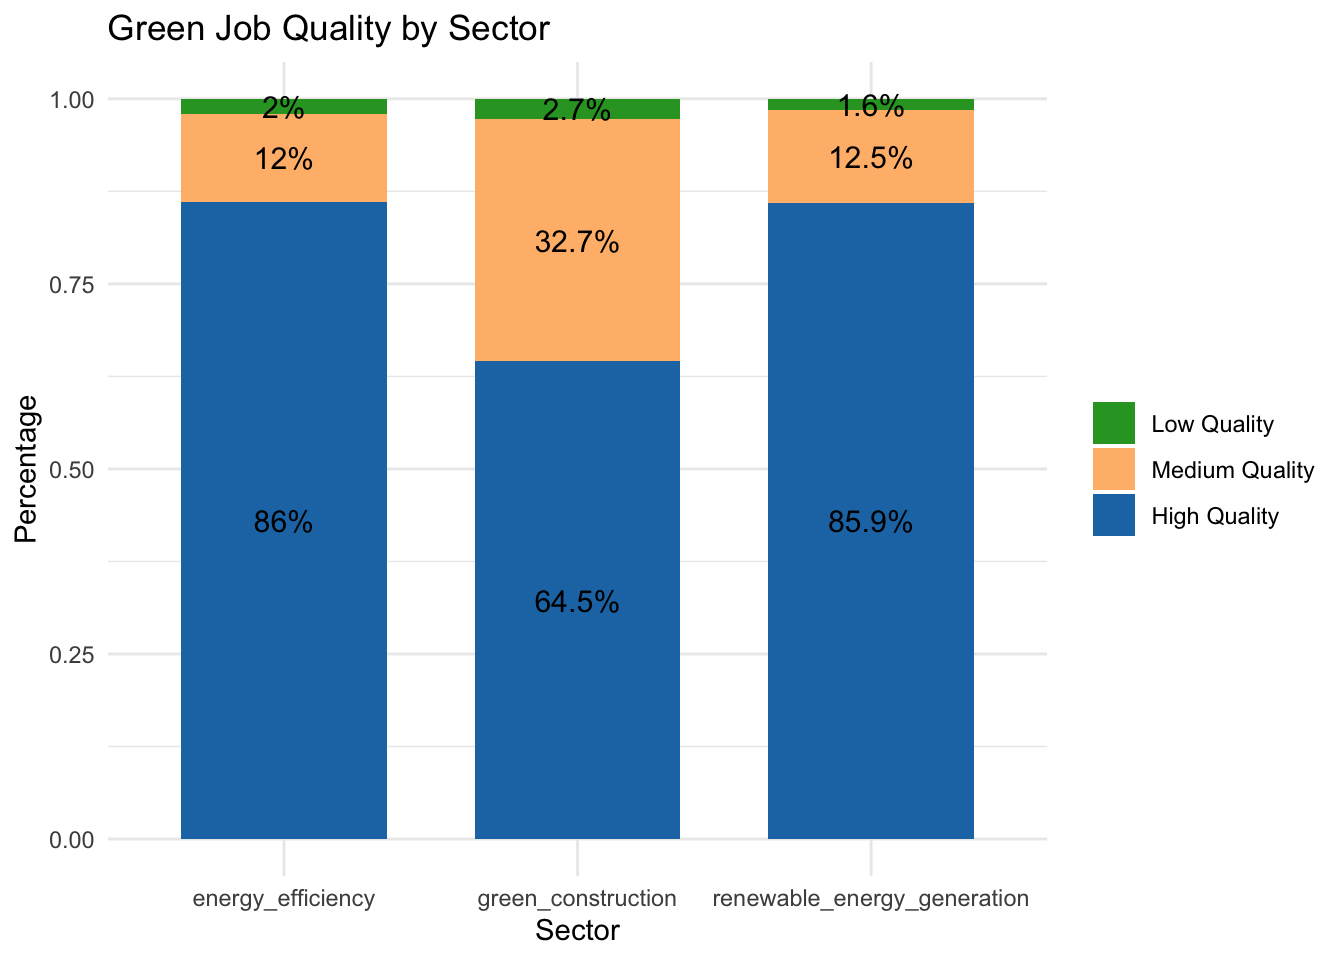

In [ ]:
# Visualize quality jobs compared across sectors
quality_summary <- quality_green_jobs %>%
  gather(key = "sector", value = "is_green_job", renewable_energy_generation, energy_efficiency, green_construction) %>%
  filter(is_green_job == 1) %>%
  group_by(sector, quality) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)

`summarise()` has grouped output by 'sector', 'quality'. You can override using
the `.groups` argument.

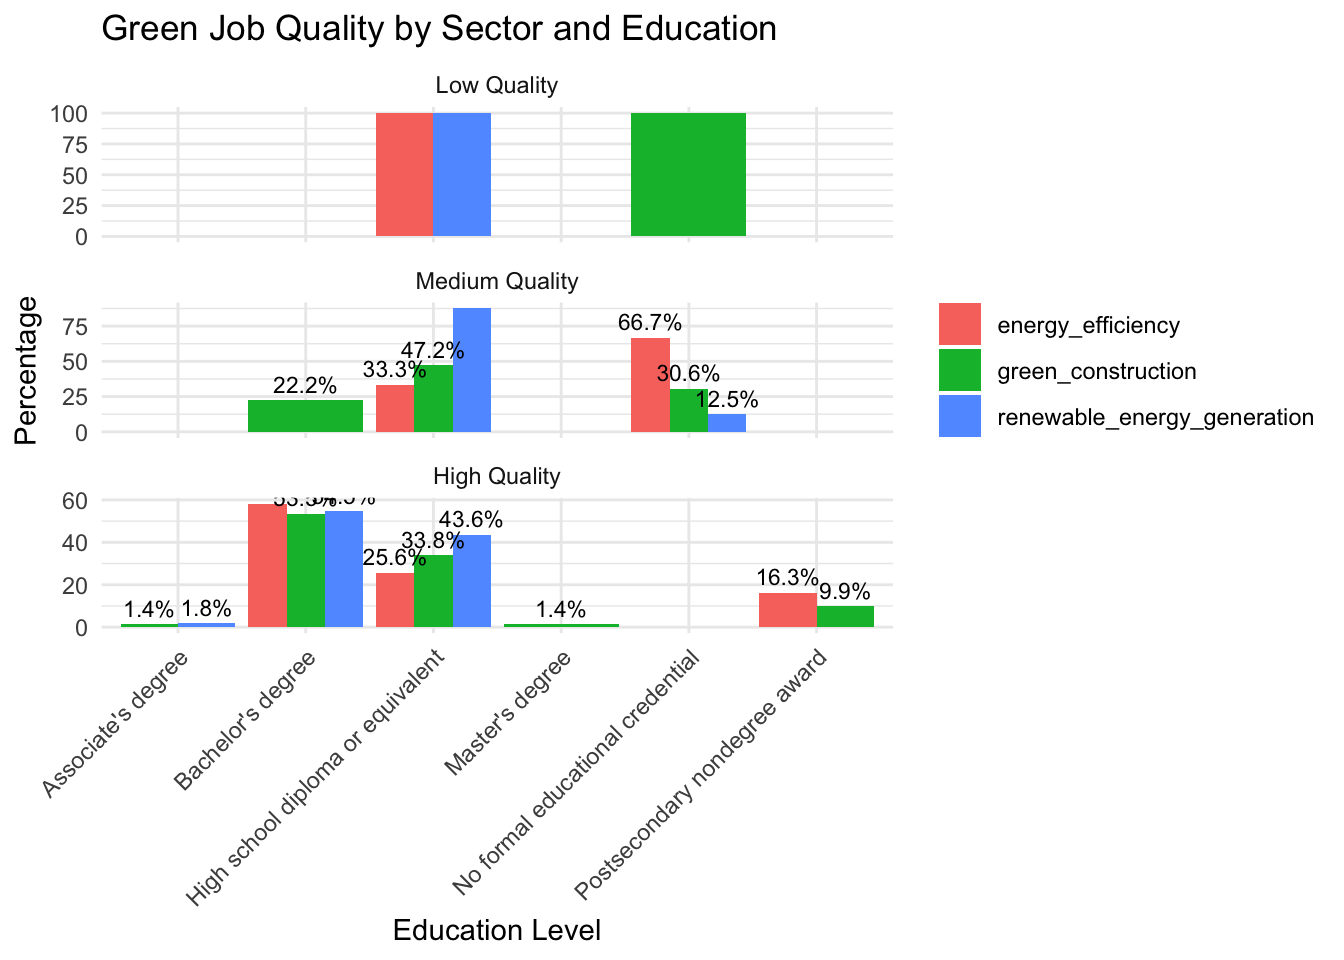

In [ ]:
# Visualize quality jobs compared for sector, education, and quality
quality_summary_education <- quality_green_jobs %>%
  gather(key = "sector", value = "is_green_job", renewable_energy_generation, energy_efficiency, green_construction) %>%
  filter(is_green_job == 1) %>%
  group_by(sector, quality, education) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)

This graph shows how the distribution of green jobs (energy efficiency, green construction, renewable energy generation) varies across different levels of education, segmented by job quality (Low, Medium, High quality).

Based on the above graph:

-   **Energy Efficiency** consistently dominates high-quality and medium-quality green jobs across most education levels, suggesting that this sector offers the most secure and rewarding jobs for those with varying levels of education.

-   **Green Construction** has a significant presence in low-quality and medium-quality jobs, especially for those with lower education levels (such as high school diplomas or no formal educational credentials).

-   **Renewable Energy Generation** seems to have fewer high-quality job opportunities compared to energy efficiency, but it does offer medium-quality opportunities, particularly for those with lower education levels.

`summarise()` has grouped output by 'sector', 'quality'. You can override using
the `.groups` argument.

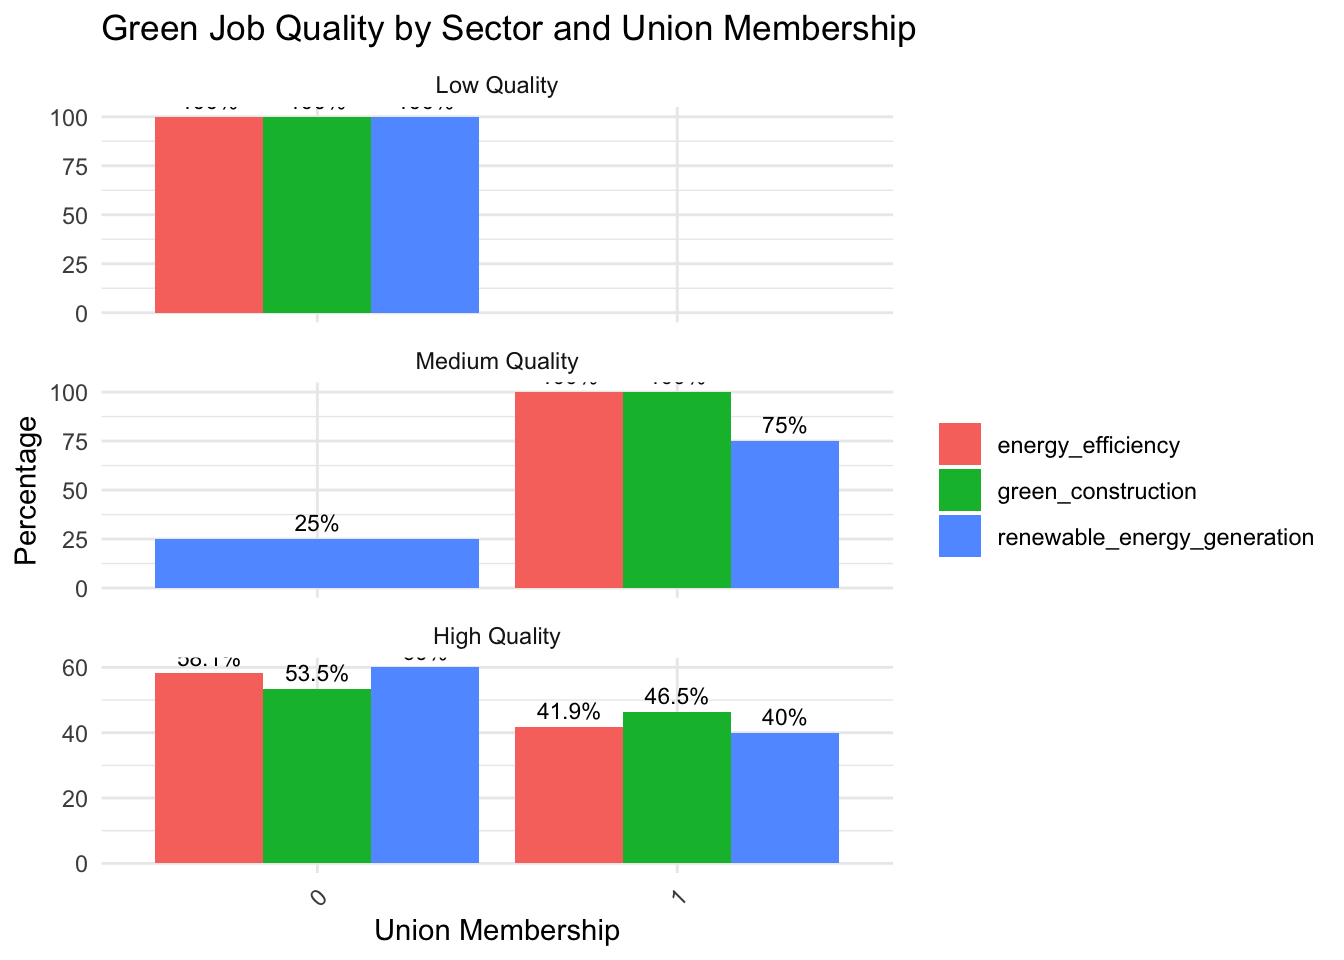

In [ ]:
# Visualize quality jobs compared for sector, union membership, and quality
quality_summary_union <- quality_green_jobs %>%
  gather(key = "sector", value = "is_green_job", renewable_energy_generation, energy_efficiency, green_construction) %>%
  filter(is_green_job == 1) %>%
  group_by(sector, quality, union) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)

The above graph shows green job quality segmented by union membership across three sectors: **Energy Efficiency**, **Green Construction**, and **Renewable Energy Generation**.

-   **Union membership** is **associated** with **higher-quality jobs** in all three sectors, particularly in energy efficiency and renewable energy generation, where a majority of high-quality jobs are unionized. This suggests that **unions play a significant role in securing better working conditions and benefits** for workers in green jobs.

-   **Medium-quality jobs** also show a clear advantage for unionized workers across the sectors, particularly in green construction and renewable energy generation.

-   The presence of **union coverage even in low-quality jobs** across sectors might indicate that unionized jobs are spread across different quality categories, though the majority of benefits seem to concentrate in medium- and high-quality roles.

In [ ]:
# Export the green quality jobs data to CSV for graphing
saveRDS(quality_green_jobs, here("processed_data", "quality_green_jobs.rds"))

write_csv(quality_green_jobs, here("processed_data", "quality_green_jobs.csv"))

### 4. Demographics of Green Job Recipients

> **RQ 4: Who is getting quality green jobs, based on education, race/ethnicity, gender, and income levels in the City of Saint Paul?**
>
> Of the more than **303,820 people** who live in **St. Paul**, **50.5%** are women, which is aligned with the national average. The majority of residents in St. Paul are **white** (54.3%). **Black or African American people** (15.6%) make up the largest community of color in the city. Other **communities of color,** including Asian (18.4%), Alaska and Native American (0.7%), Hispanic or Latino (8.6%) and Two or More Races (7.8%), make up about 41.5% of the population. Around **42.8% of people aged 25 and older have a bachelor’s degree** in St. Paul, which is higher than the national rate of 34% but lower than Minneapolis’ 54%.
>
> Across all sectors and job quality categories in Saint Paul, **men are significantly overrepresented** in green jobs, particularly in high and medium-quality jobs. This is consistent across energy efficiency, green construction, and renewable energy generation. **Women** are particularly underrepresented in high and medium-quality jobs across all sectors, especially in green construction and renewable energy generation. 
>
> Across all three sectors and job quality levels, **white individuals are heavily overrepresented**, particularly in high and medium-quality jobs. This trend is consistent across energy efficiency, green construction, and renewable energy generation. **People of color,** particularly American Indian, Black or African American, and individuals from some other races, are underrepresented in high-quality jobs across all sectors. While there is some representation in low and medium-quality jobs, these groups still have limited access to the higher-quality roles.
>
> **Higher education,** particularly bachelor's degrees and professional degrees beyond a bachelor's, plays a significant role in accessing **high-quality green jobs** across all sectors in Saint Paul. In sectors like energy efficiency, having a bachelor's degree appears to be almost a prerequisite for high-quality roles.
>
> **Medium-quality jobs** tend to be more accessible to individuals with a wider variety of educational backgrounds, including those with high school diplomas, GEDs, and some college education.
>
> **Lower educational attainment** is more common in low-quality jobs across all sectors. Individuals with high school diplomas or GEDs are more likely to be found in low-quality roles in all sectors.
>
> Across all sectors and job quality categories, **white workers tend to have higher income** ranges compared to other racial groups. This disparity is most pronounced in high-quality jobs, where White workers dominate the upper-income brackets.
>
> While other racial groups are present in high-quality jobs, **their income distribution is narrower and lower than that of white workers.** Asian workers in green construction are the closest to White workers in terms of income distribution, but other racial groups, such as Black or African American workers, tend to earn significantly less.
>
> **Low-quality jobs** show more clustering toward lower-income brackets across all racial groups, with fewer opportunities for higher earnings. While white workers still tend to earn more in low-quality jobs, the income gap is narrower compared to higher-quality roles.

In the following figures, we describe the challenges women and people of color in Saint Paul are likely to face in equitably accessing the jobs that may be created through BIL and IRA funding in three specific sectors: energy efficiency, renewable-energy generation, and green construction.

-   **2023 Occupational Employment and Wage Survey (OEWS):**

    -   Provides employment and wage data by occupation.

    -   It’s organized at the **Metropolitan Statistical Area (MSA)** level, which includes a broader geographic area (e.g., Minneapolis-St. Paul-Bloomington, MN-WI Metro).

    -   This data gives insights into **jobs and wages** but lacks detailed individual demographics such as race, ethnicity, education, etc.

-   **Geocorr Data from the Missouri Census Data Center:**

    -   This data helps map geographic boundaries like PUMAs (Public Use Microdata Areas) to more specific local areas, such as St. Paul.

    -   By using geographic weighting from Geocorr, we can estimate **St. Paul-specific** statistics from the broader MSA-level data in the OEWS.

1.  Load and explore the two datasets.
2.  Filter the OEWS data to the Minneapolis-St. Paul-Bloomington Metro area.
3.  Get weights from the Geocorr file to adjust for St. Paul’s population.
4.  Merge demographic data (from ACS) with the estimated job/wage data from OEWS.
5.  Analyze the final dataset for insights into who holds green jobs in St. Paul.

We will first need to load the **OEWS** data (Occupational Employment and Wage Survey) and the **Geocorr** data (geographic weights from the Missouri Census Data Center) into R.

-   **OEWS:** processed_data/OWES_and_ONET_St_Paul

-   **Geocorr:** raw_data/Geocorr from the Missouri Census Data Center - Minnesota.xlsx

We have the **ACS (American Community Survey)** data that provides demographic information (education, race, gender, income), so we’ll load that as well.

-   **ACS:** processed_data/St_Paul_ACS_All_Jobs.csv

**Load the OEWS data** (Occupational Employment and Wage Survey), the Geocorr data (geographic weights from the Missouri Census Data Center), and the ACS (American Community Survey) data that provides demographic information (education, race, gender, income). The OEWS Data: is already filtered to the Minneapolis-St. Paul-Bloomington, MN-WI Metro Area.

In [ ]:
# Load St. Paul jobs data (OEWS dataset)
st_paul_jobs <- read_csv(here("processed_data", "OWES_and_ONET-St_Paul.csv"))

Rows: 742 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (26): AREA_TITLE, PRIM_STATE, NAICS_TITLE, I_GROUP, OCC_CODE, OCC_TITLE,...
dbl  (4): AREA, AREA_TYPE, NAICS, OWN_CODE
lgl  (4): PCT_TOTAL, PCT_RPT, ANNUAL, HOURLY

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 1730 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): RT, SERIALNO, SOCP, RAC1P, SEX, SCHL, O*NET-SOC Title
dbl (12): DIVISION, SPORDER, PUMA20, REGION, ST, AGEP, PINCP, ADJINC, WAGP, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

**Use Geocorr to apply weights.** The **Geocorr** data provides the geographic weights that represent the population of St. Paul relative to the larger metro area.The purpose of this step is to adjust the OEWS data to better represent **St. Paul** specifically. We will calculate the percentage of St. Paul’s population in the larger metro area using **Geocorr** and apply this as a weight to the OEWS data.

Since we are working with PUMAs (Public Use Microdata Areas) and need to adjust the OEWS data for St. Paul using the Geocorr weights, we’ll focus on using:

-   `Total population (2020 Census)` to understand the population of each PUMA.

-   `puma22-to-cbsa20` allocation factor, which represents the proportion of the population in each PUMA that falls within the Minneapolis-St. Paul-Bloomington metro area.

The St. Paul weighted allocation factor is 1, which means that for these specific PUMAs (representing **Ramsey County–St. Paul City**), the entire population is considered part of the Minneapolis-St. Paul-Bloomington metro area. This result suggests that we can apply the full population of these PUMAs without needing further weighting, which simplifies the next steps.

In [ ]:
# Filter the Geocorr data to only include St. Paul PUMAs
st_paul_geocorr <- geocorr_data %>%
  filter(`PUMA22 name` %in% c(
    "Ramsey County--St. Paul City (Northwest)", 
    "Ramsey County--St. Paul City (Southwest)", 
    "Ramsey County--St. Paul City (East)"
  ))

# Calculate the total population for St. Paul PUMAs and the weighted allocation factor
st_paul_population <- sum(st_paul_geocorr$`Total population (2020 Census)`, na.rm = TRUE)
metro_population <- sum(geocorr_data$`Total population (2020 Census)`, na.rm = TRUE)

# Calculate the weighted population factor for St. Paul within the metro area using the allocation factor
st_paul_weight <- sum(st_paul_geocorr$`puma22-to-cbsa20 allocation factor`, na.rm = TRUE) / nrow(st_paul_geocorr)

# Output the results
cat("St. Paul weighted allocation factor:", st_paul_weight, "\n")

St. Paul weighted allocation factor: 1 

St. Paul population: 311,527 

Metro area population: 5,706,494 

**Estimate St. Paul-specific data**. Multiply the employment numbers and wages in the **OEWS** data by the St. Paul weight to get **St. Paul-specific** employment and wage estimates.

We’ll multiply the employment numbers (TOT_EMP) and wages (H_MEAN and A_MEAN) from the **OEWS** dataset by this St. Paul weight to get **St. Paul-specific estimates**.

In [ ]:
# Ensure that the necessary columns are numeric
st_paul_jobs <- st_paul_jobs %>%
  mutate(
    TOT_EMP = as.numeric(TOT_EMP),  # Convert total employment to numeric
    H_MEAN = as.numeric(H_MEAN),    # Convert mean hourly wage to numeric
    A_MEAN = as.numeric(A_MEAN)     # Convert mean annual wage to numeric
  )

The first warning was:
ℹ In argument: `TOT_EMP = as.numeric(TOT_EMP)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings.

Rows: 742
Columns: 37
$ AREA               <dbl> 33460, 33460, 33460, 33460, 33460, 33460, 33460, 33…
$ AREA_TITLE         <chr> "Minneapolis-St. Paul-Bloomington, MN-WI", "Minneap…
$ AREA_TYPE          <dbl> 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, …
$ PRIM_STATE         <chr> "MN", "MN", "MN", "MN", "MN", "MN", "MN", "MN", "MN…
$ NAICS              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ NAICS_TITLE        <chr> "Cross-industry", "Cross-industry", "Cross-industry…
$ I_GROUP            <chr> "cross-industry", "cross-industry", "cross-industry…
$ OWN_CODE           <dbl> 1235, 1235, 1235, 1235, 1235, 1235, 1235, 1235, 123…
$ OCC_CODE           <chr> "00-0000", "11-0000", "11-1011", "11-1021", "11-103…
$ OCC_TITLE          <chr> "All Occupations", "Management Occupations", "Chief…
$ O_GROUP            <chr> "total", "major", "detailed", "detailed", "detailed…
$ TOT_EMP            <dbl> 1911030, 140870, 4420, 48300, 70, 90, 7000, 7390, 9…
$ EMP_PRSE        

# A tibble: 1 × 3
  Total_Employment Mean_Hourly_Wage Mean_Annual_Wage
             <dbl>            <dbl>            <dbl>
1          5751890             36.6           77675.

In [ ]:
# Replace NA values in 'O*NET-SOC Sector' with 'Other'
st_paul_jobs_weighted <- st_paul_jobs_weighted %>%
  mutate(`O*NET-SOC Sector` = ifelse(is.na(`O*NET-SOC Sector`), "Other", `O*NET-SOC Sector`))

# Group by 'O*NET-SOC Sector' and calculate the total employment, mean hourly wage, and mean annual wage
sector_summary_st_paul <- st_paul_jobs_weighted %>%
  group_by(`O*NET-SOC Sector`) %>%
  summarize(
    Total_Employment = sum(TOT_EMP_St_Paul, na.rm = TRUE),
    Mean_Hourly_Wage = mean(H_MEAN_St_Paul, na.rm = TRUE),
    Mean_Annual_Wage = mean(A_MEAN_St_Paul, na.rm = TRUE)
  )

# Output the sector-wise summary
print(sector_summary_st_paul)

# A tibble: 4 × 4
  `O*NET-SOC Sector`          Total_Employment Mean_Hourly_Wage Mean_Annual_Wage
  <chr>                                  <dbl>            <dbl>            <dbl>
1 Energy Efficiency                      66410             45.5           94669.
2 Green Construction                    124680             37.9           78809.
3 Other                                5537550             36.3           77193.
4 Renewable Energy Generation            23250             44.7           92991.

**Incorporate ACS demographics**. We will merge the OEWS data with the **ACS** data. The **ACS data** has demographic information like education, race/ethnicity, gender, and income levels. This will allow us to analyze the green job data segmented by these demographic factors in **St. Paul**.

In [ ]:
# Convert the O*NET-SOC code to character in both datasets
st_paul_jobs_weighted <- st_paul_jobs_weighted %>%
  mutate(`O*NET-SOC Code` = as.character(`O*NET-SOC Code`))

acs_data <- acs_data %>%
  mutate(`O*NET-SOC Code` = as.character(`O*NET-SOC Code`))

In [ ]:
# Filter the ACS data to only include rows where 'Green Job Flag' is 1
acs_green_data <- acs_data %>% 
  filter(`Green Job Flag` == 1)

# Check the filtered data to ensure it looks correct
glimpse(acs_green_data)

Rows: 72
Columns: 19
$ RT                <chr> "P", "P", "P", "P", "P", "P", "P", "P", "P", "P", "P…
$ SERIALNO          <chr> "2022GQ0001538", "2022GQ0013624", "2022GQ0025479", "…
$ DIVISION          <dbl> 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4…
$ SPORDER           <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 1, 1, 2, 2, 2…
$ PUMA20            <dbl> 1505, 1504, 1504, 1503, 1503, 1505, 1504, 1504, 1504…
$ REGION            <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2…
$ ST                <dbl> 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, …
$ AGEP              <dbl> 54, 19, 18, 50, 20, 42, 18, 18, 50, 20, 21, 67, 45, …
$ SOCP              <chr> "472181", "537062", "537062", "537062", "537062", "4…
$ RAC1P             <chr> "White alone", "Asian alone", "Two or More Races", "…
$ SEX               <chr> "Male", "Male", "Male", "Male", "Male", "Male", "Mal…
$ SCHL              <chr> "GED or alternative credential", "Regular high schoo…
$ PINCP            

In [ ]:
# Remove rows with NA O*NET-SOC Codes in both datasets before merging
st_paul_jobs_weighted <- st_paul_jobs_weighted %>%
  filter(!is.na(`O*NET-SOC Code`))

acs_green_data <- acs_green_data %>%
  filter(!is.na(`O*NET-SOC Code`))

# Re-check the unique O*NET-SOC Codes after filtering out NA values
unique_jobs_codes <- unique(st_paul_jobs_weighted$`O*NET-SOC Code`)
unique_acs_codes <- unique(acs_green_data$`O*NET-SOC Code`)

# Find codes that exist in one dataset but not the other
missing_in_acs <- setdiff(unique_jobs_codes, unique_acs_codes)
missing_in_jobs <- setdiff(unique_acs_codes, unique_jobs_codes)

# Output the results
cat("Codes in jobs but not in ACS:", missing_in_acs, "\n")

Codes in jobs but not in ACS: 11-1021 11-3071 11-9021 13-2051 17-1011 17-1012 17-2051 17-2071 17-2141 17-3011 19-3051 47-2011 47-2031 47-2051 47-2061 47-2073 47-2111 47-2131 47-2152 47-2181 47-2211 47-2221 47-4011 47-4041 49-9021 49-9051 49-9098 51-2041 51-4041 51-4121 51-8012 51-8013 51-8021 51-9012 53-6051 53-7051 53-7062 47-5041 49-9042 19-4051 51-8011 19-4041 47-5013 13-1073 47-3012 

Codes in ACS but not in jobs: 472181 537062 472061 514041 111021 472111 132051 537051 172141 172051 472152 472031 474011 113071 171011 119021 518021 

Codes in jobs but not in ACS: 171012 172071 173011 193051 472011 472051 472073 472131 472211 472221 474041 499021 499051 499098 512041 514121 518012 518013 519012 536051 475041 499042 194051 518011 194041 475013 131073 473012 

Codes in ACS but not in jobs:  

In [ ]:
# Merge the 'st_paul_jobs_weighted' data with 'acs_green_data' using the 'O*NET-SOC Code' column
merged_green_jobs_data <- st_paul_jobs_weighted %>%
  left_join(acs_green_data, by = "O*NET-SOC Code")

Warning in left_join(., acs_green_data, by = "O*NET-SOC Code"): Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 17 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.

In [ ]:
# Assess the number of duplicates in the merged dataset by counting occurrences of each O*NET-SOC Code
duplication_summary <- merged_green_jobs_data %>%
  group_by(`O*NET-SOC Code`) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# View the summary of duplication
print(duplication_summary)

# A tibble: 45 × 2
   `O*NET-SOC Code` count
   <chr>            <int>
 1 537062              21
 2 172141              12
 3 472061               8
 4 472111               7
 5 111021               6
 6 132051               6
 7 172051               6
 8 113071               3
 9 171011               3
10 172071               3
# ℹ 35 more rows

If we need accurate totals or averages across jobs and demographics, **aggregation** will be necessary to avoid inflating the data.

If we feel the current level of detail (with the duplicates) provides useful insights, we can keep the data as is but be mindful of how we interpret summed metrics. This is what we will do. The duplication is meaningful (for example, because a job can truly exist in multiple sectors or demographics are validly associated with multiple jobs), we choose to keep the dataset as is. This would allow us to analyze the data with all the overlaps. However, we need to be cautious that this doesn’t skew metrics that sum values (like total employment).

**Analyze the data**. Once the datasets are merged, we can start analyzing the data to answer our research question.

Now that we’ve merged the **OEWS** and **ACS** data, we can group by the **O\*NET-SOC Sector** (Energy Efficiency, Renewable Energy Generation, Green Construction) and demographic factors like **education**, **race**, **gender**, and **income**.

In [ ]:
# Convert data types
merged_green_jobs_data <- merged_green_jobs_data %>%
  mutate(
    NAICS_TITLE = as.factor(NAICS_TITLE),  # Factor for industry titles
    I_GROUP = as.factor(I_GROUP),  # Factor for industry group
    O_GROUP = as.factor(O_GROUP),  # Factor for occupation group
    H_PCT10 = as.numeric(H_PCT10),  # Convert percentages to numeric
    H_PCT25 = as.numeric(H_PCT25),
    H_MEDIAN = as.numeric(H_MEDIAN),
    H_PCT75 = as.numeric(H_PCT75),
    H_PCT90 = as.numeric(H_PCT90),
    A_PCT10 = as.numeric(A_PCT10),
    A_PCT25 = as.numeric(A_PCT25),
    A_MEDIAN = as.numeric(A_MEDIAN),
    A_PCT75 = as.numeric(A_PCT75),
    A_PCT90 = as.numeric(A_PCT90),
    ANNUAL = as.numeric(ANNUAL),  # Convert to numeric for consistency
    HOURLY = as.numeric(HOURLY),
    `O*NET-SOC Sector` = as.factor(`O*NET-SOC Sector`),  # Factor for green job sectors
    TOT_EMP_St_Paul = as.numeric(TOT_EMP_St_Paul),  # Numeric for employment totals
    H_MEAN_St_Paul = as.numeric(H_MEAN_St_Paul),  # Numeric for hourly wage in St. Paul
    A_MEAN_St_Paul = as.numeric(A_MEAN_St_Paul),  # Numeric for annual wage in St. Paul
    AGEP = as.factor(AGEP),  # Age as a factor if we treat it categorically
    RAC1P = as.factor(RAC1P),  # Factor for race
    SEX = as.factor(SEX),  # Factor for gender
    SCHL = as.factor(SCHL),  # Factor for education level
    PINCP = as.numeric(PINCP),  # Numeric for personal income
    ADJINC = as.numeric(ADJINC),  # Numeric for adjusted income
    WAGP = as.numeric(WAGP),  # Numeric for wage
    PWGTP = as.numeric(PWGTP),  # Numeric for person weight
    `Green Job Flag` = as.numeric(`Green Job Flag`)  # Yes/No as numeric
  )

The first warning was:
ℹ In argument: `H_PCT10 = as.numeric(H_PCT10)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 9 remaining warnings.

But we first need to map the quality jobs **from quality_green_jobs** into `merged_green_jobs_data` so we can indicate jobs that are high, medium or low-quality.

In [ ]:
# Ensure both variables are of the same type
quality_green_jobs <- quality_green_jobs %>%
  mutate(occ6 = as.character(occ6))

merged_green_jobs_data <- merged_green_jobs_data %>%
  mutate(OCC_CODE = as.character(OCC_CODE))

# Perform the left join to add the 'quality' variable from quality_green_jobs
merged_green_jobs_data <- merged_green_jobs_data %>%
  left_join(quality_green_jobs %>% select(occ6, quality), 
            by = c("OCC_CODE" = "occ6"))

Warning in left_join(., quality_green_jobs %>% select(occ6, quality), by = c(OCC_CODE = "occ6")): Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 7 of `x` matches multiple rows in `y`.
ℹ Row 40 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.

To group by the `O*NET-SOC Sector` and demographic factors like `education`, `race`, `gender`, and `income`, we can create summary statistics for each sector to analyze how the green jobs are distributed across different demographic categories.

#### Education levels

In [ ]:
# Group the data by sector and demographic variables, then summarize the counts and income
green_job_summary <- merged_green_jobs_data %>%
  group_by(`O*NET-SOC Sector`, SCHL, RAC1P, SEX) %>%
  summarise(
    total_jobs = n(),  # Count total jobs
    mean_income = mean(PINCP, na.rm = TRUE)  # Calculate mean income for each group
  )

`summarise()` has grouped output by 'O*NET-SOC Sector', 'SCHL', 'RAC1P'. You
can override using the `.groups` argument.

# A tibble: 52 × 6
# Groups:   O*NET-SOC Sector, SCHL, RAC1P [46]
   `O*NET-SOC Sector` SCHL                    RAC1P SEX   total_jobs mean_income
   <fct>              <fct>                   <fct> <fct>      <int>       <dbl>
 1 Energy Efficiency  1 or more years of col… Whit… Fema…         12      15000 
 2 Energy Efficiency  1 or more years of col… Whit… Male           1      41000 
 3 Energy Efficiency  Associate's degree      Whit… Male           1      46500 
 4 Energy Efficiency  Bachelor's degree       Two … Fema…         12     102000 
 5 Energy Efficiency  Bachelor's degree       Whit… Fema…          2      40000 
 6 Energy Efficiency  Bachelor's degree       Whit… Male          14      98786.
 7 Energy Efficiency  Grade 9                 Whit… Fema…          1          0 
 8 Energy Efficiency  Master's degree         Asia… Male          12      80000 
 9 Energy Efficiency  Master's degree         Whit… Fema…          1     113250 
10 Energy Efficiency  Regular high school d

`summarise()` has grouped output by 'O*NET-SOC Sector'. You can override using
the `.groups` argument.

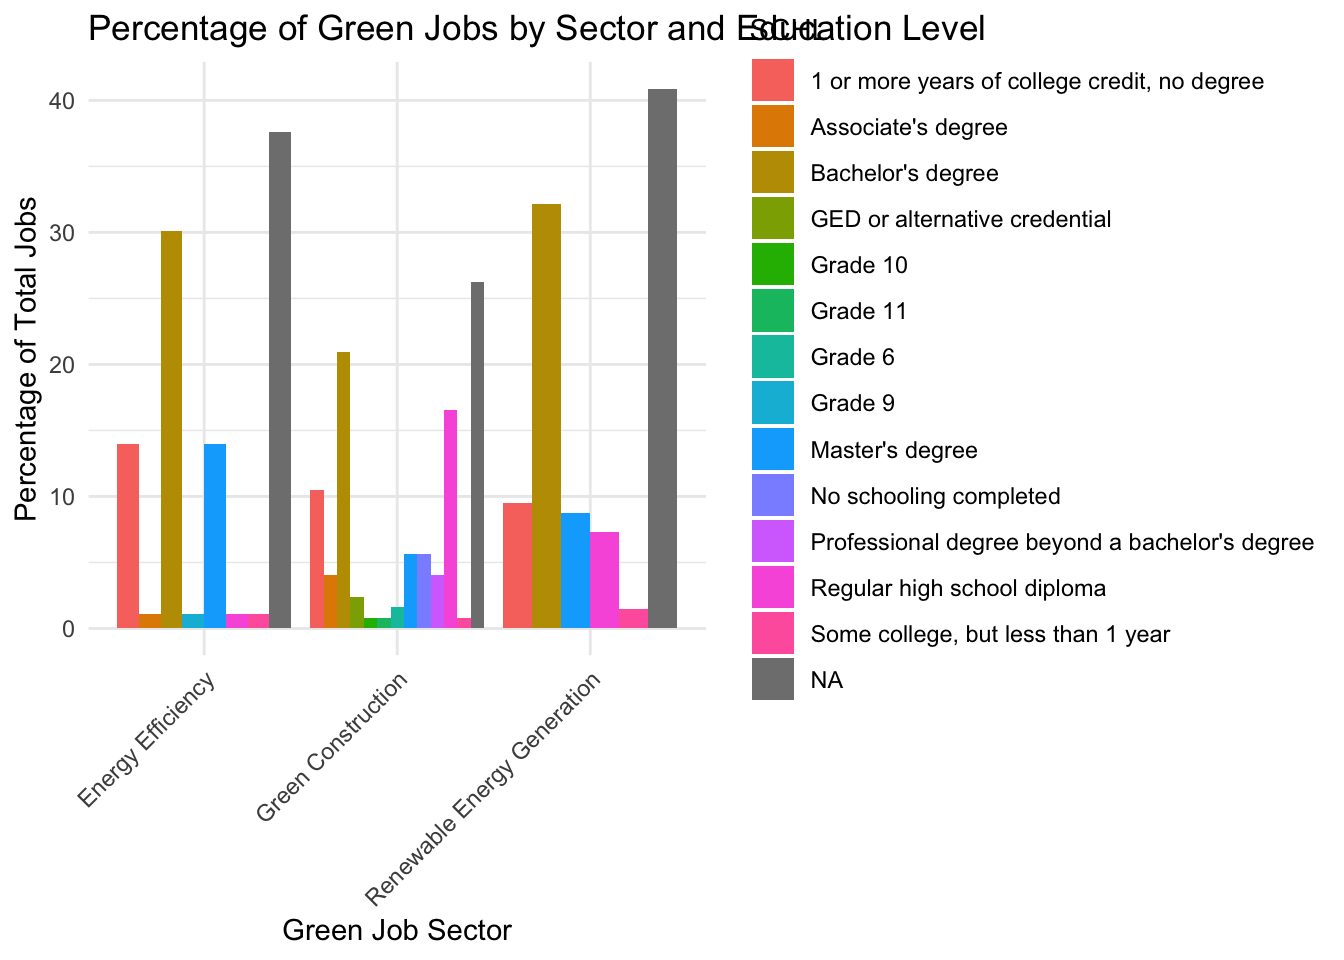

`summarise()` has grouped output by 'O*NET-SOC Sector', 'quality'. You can
override using the `.groups` argument.

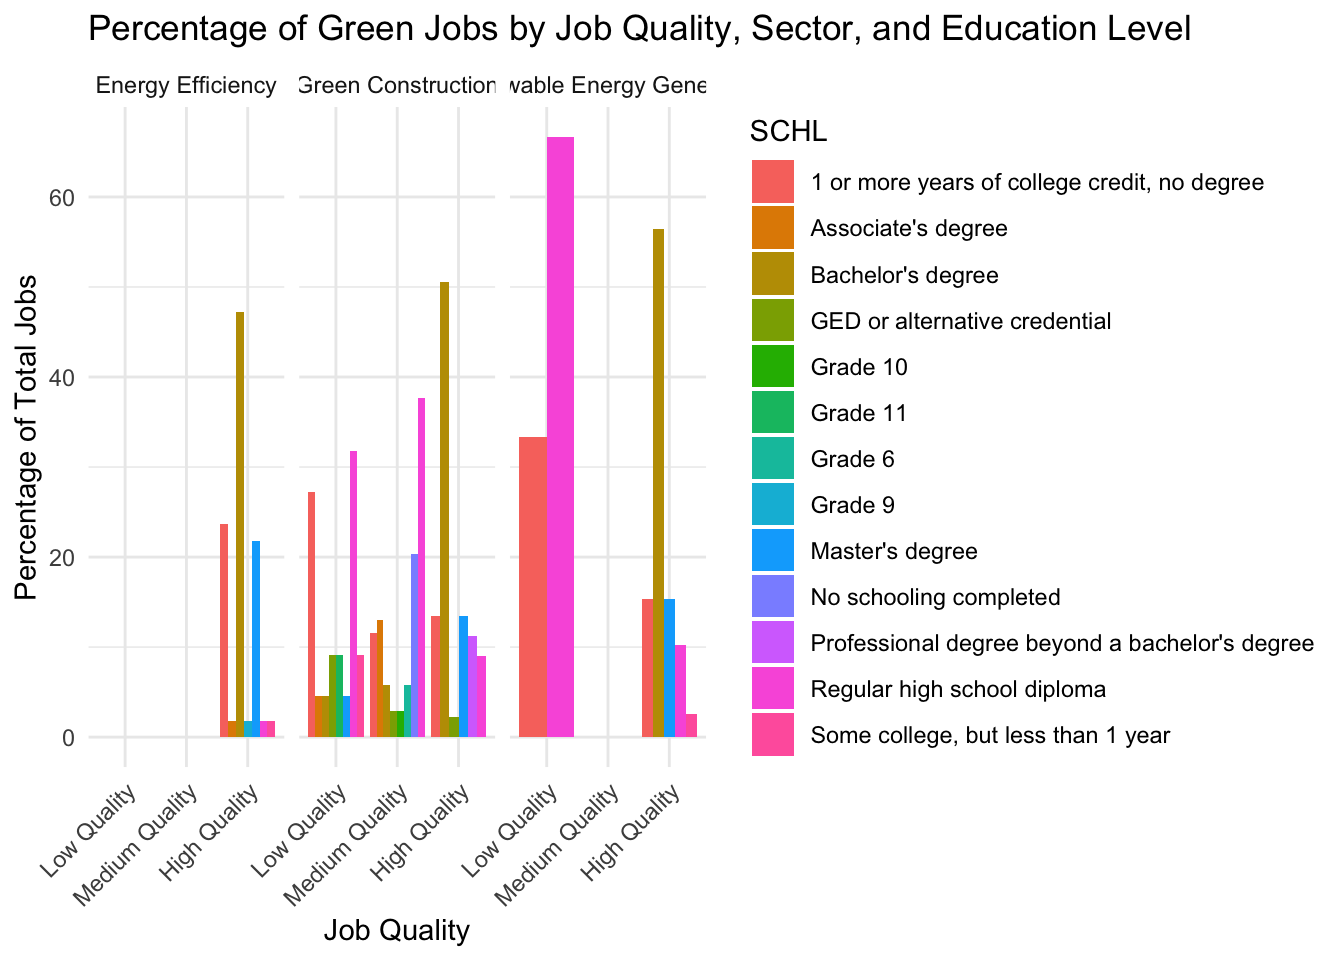

In [ ]:
# Plot percentage of jobs by sector and education level
green_job_summary_percentage <- merged_green_jobs_data %>%
  group_by(`O*NET-SOC Sector`, SCHL) %>%
  summarise(total_jobs = n()) %>%
  mutate(percentage_jobs = total_jobs / sum(total_jobs) * 100)

#### Race

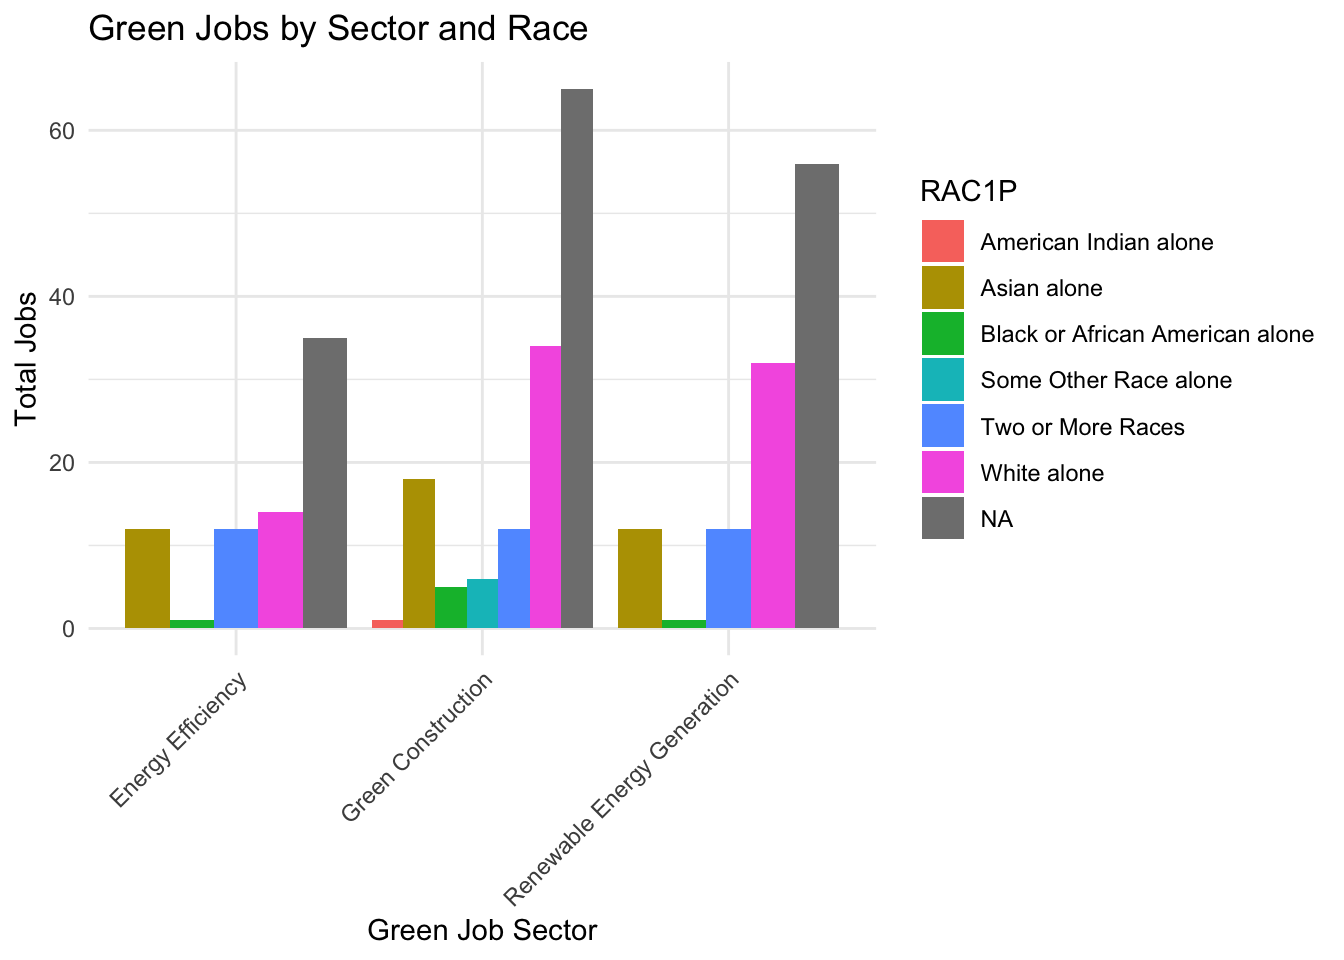

`summarise()` has grouped output by 'O*NET-SOC Sector'. You can override using
the `.groups` argument.

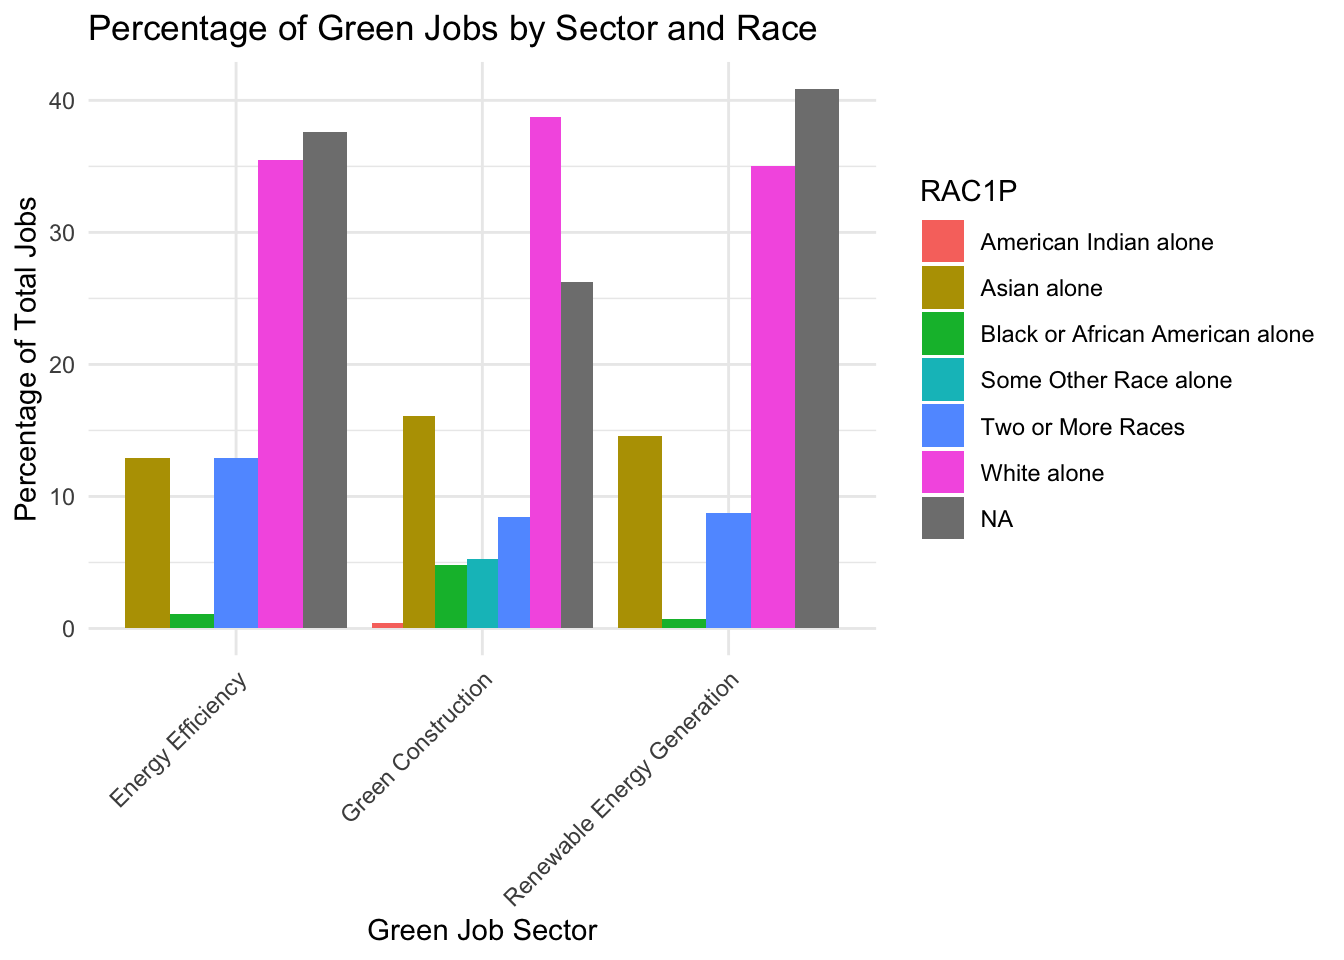

`summarise()` has grouped output by 'O*NET-SOC Sector', 'quality'. You can
override using the `.groups` argument.

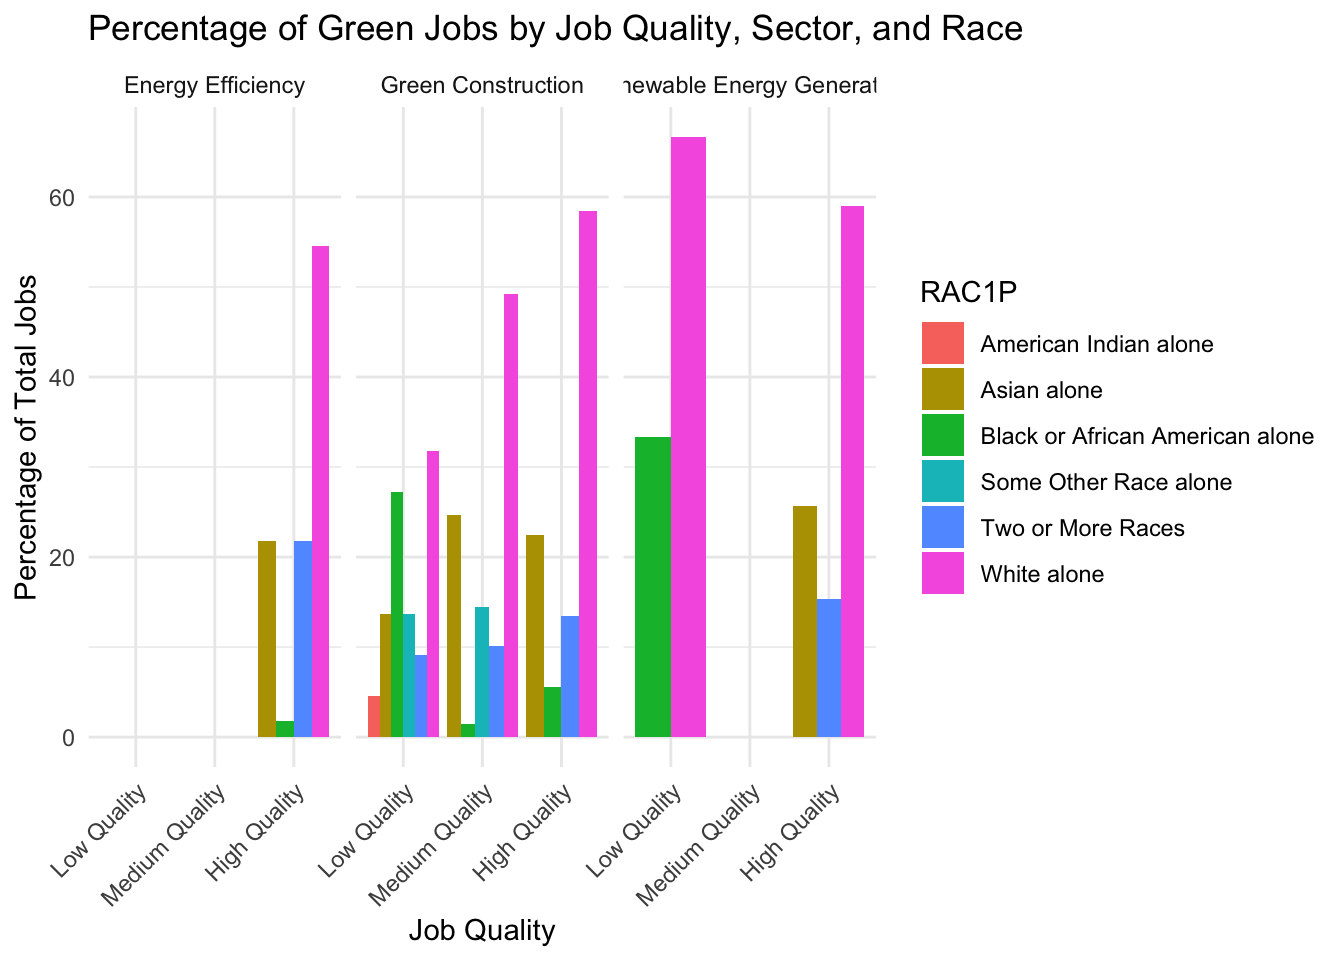

In [ ]:
# Bar plot for green jobs by sector and race
ggplot(green_job_summary, aes(x = `O*NET-SOC Sector`, y = total_jobs, fill = RAC1P)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Green Jobs by Sector and Race",
       x = "Green Job Sector", y = "Total Jobs") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

#### Gender

`summarise()` has grouped output by 'O*NET-SOC Sector'. You can override using
the `.groups` argument.

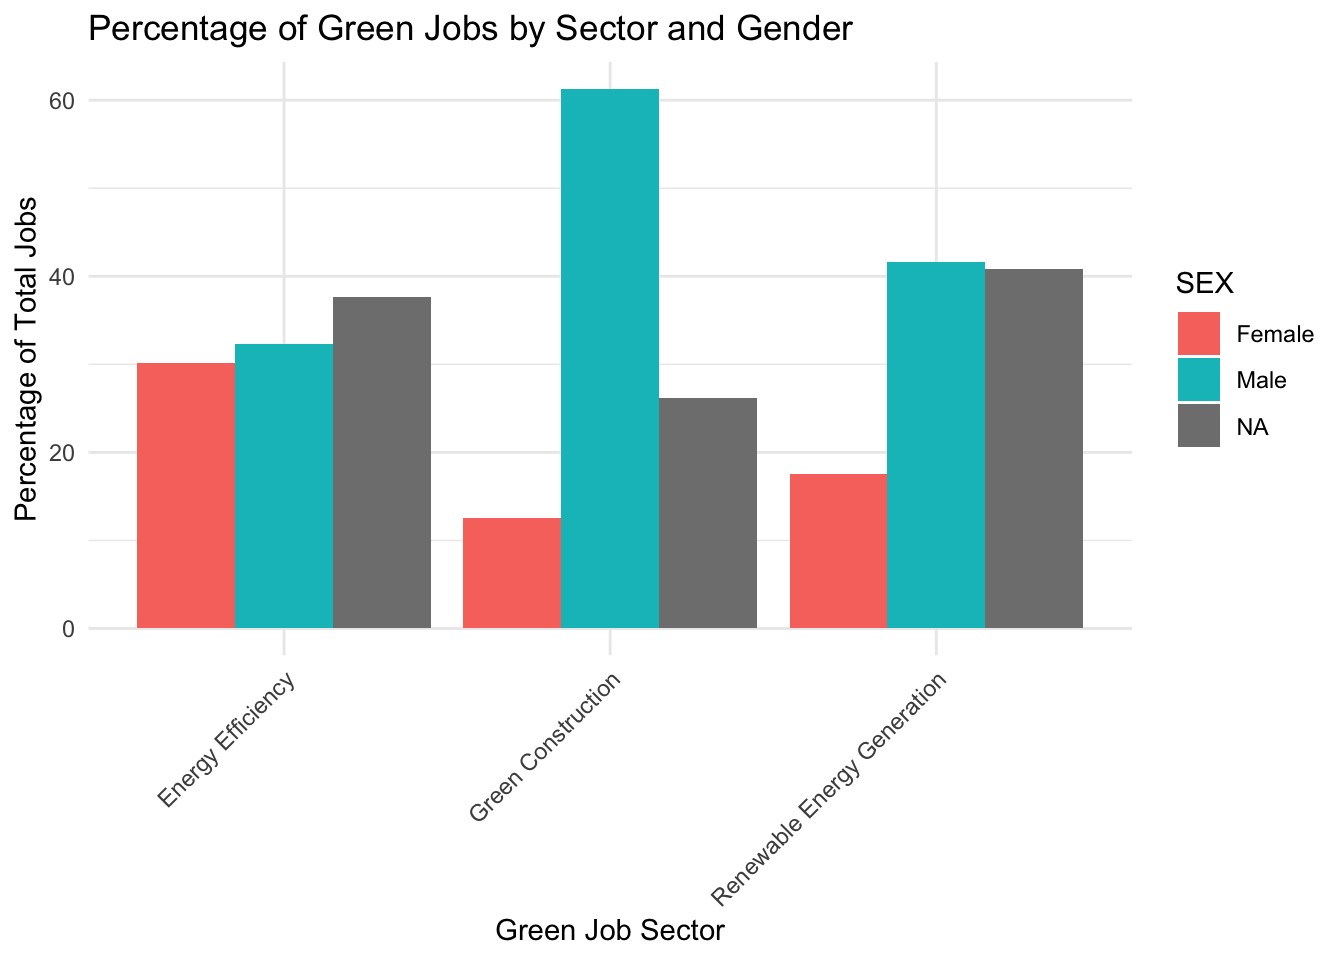

`summarise()` has grouped output by 'quality'. You can override using the
`.groups` argument.

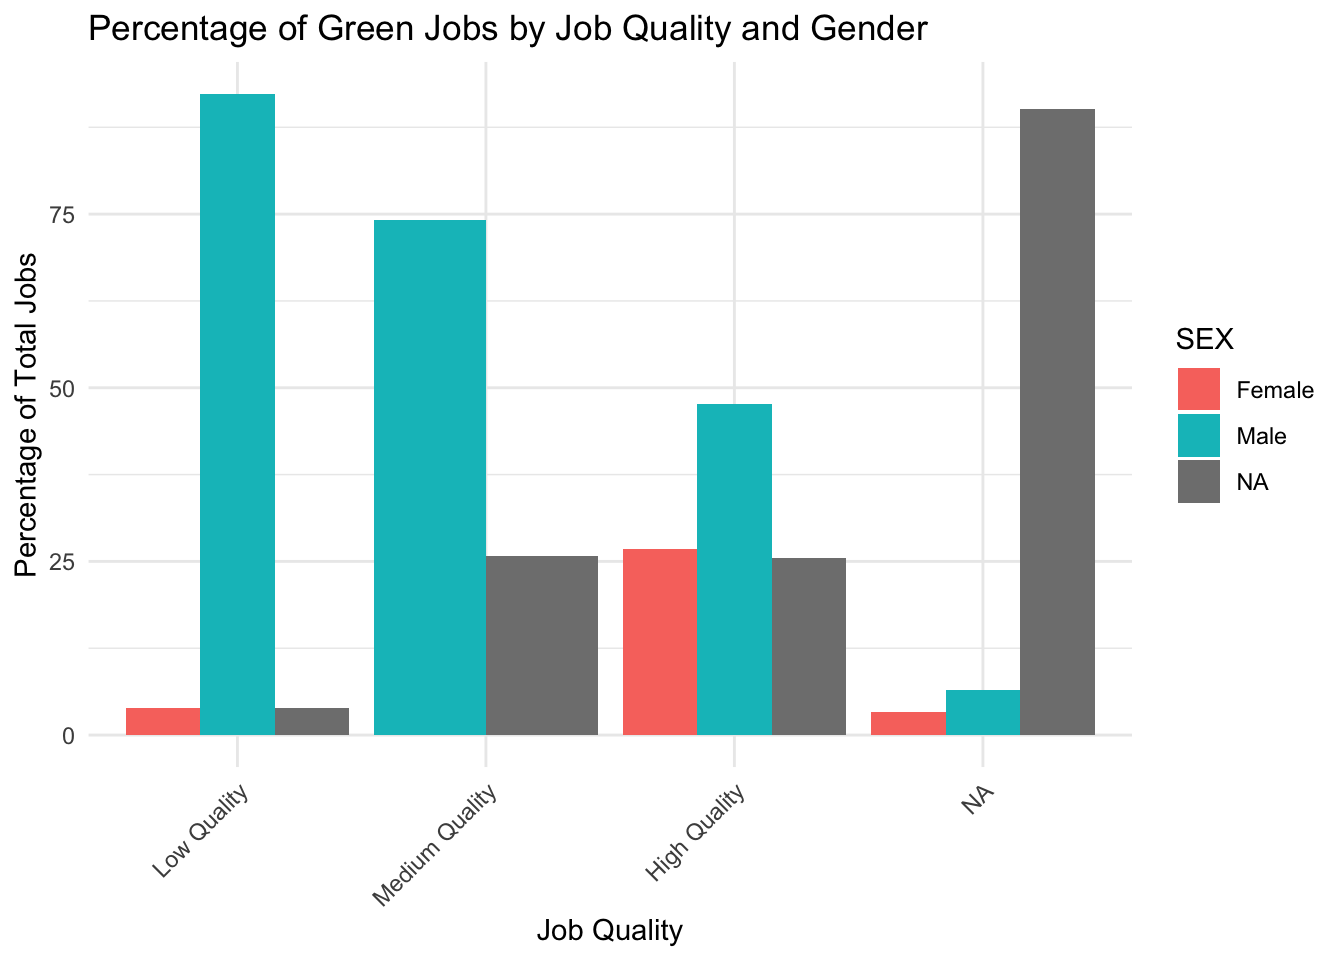

`summarise()` has grouped output by 'O*NET-SOC Sector', 'quality'. You can
override using the `.groups` argument.

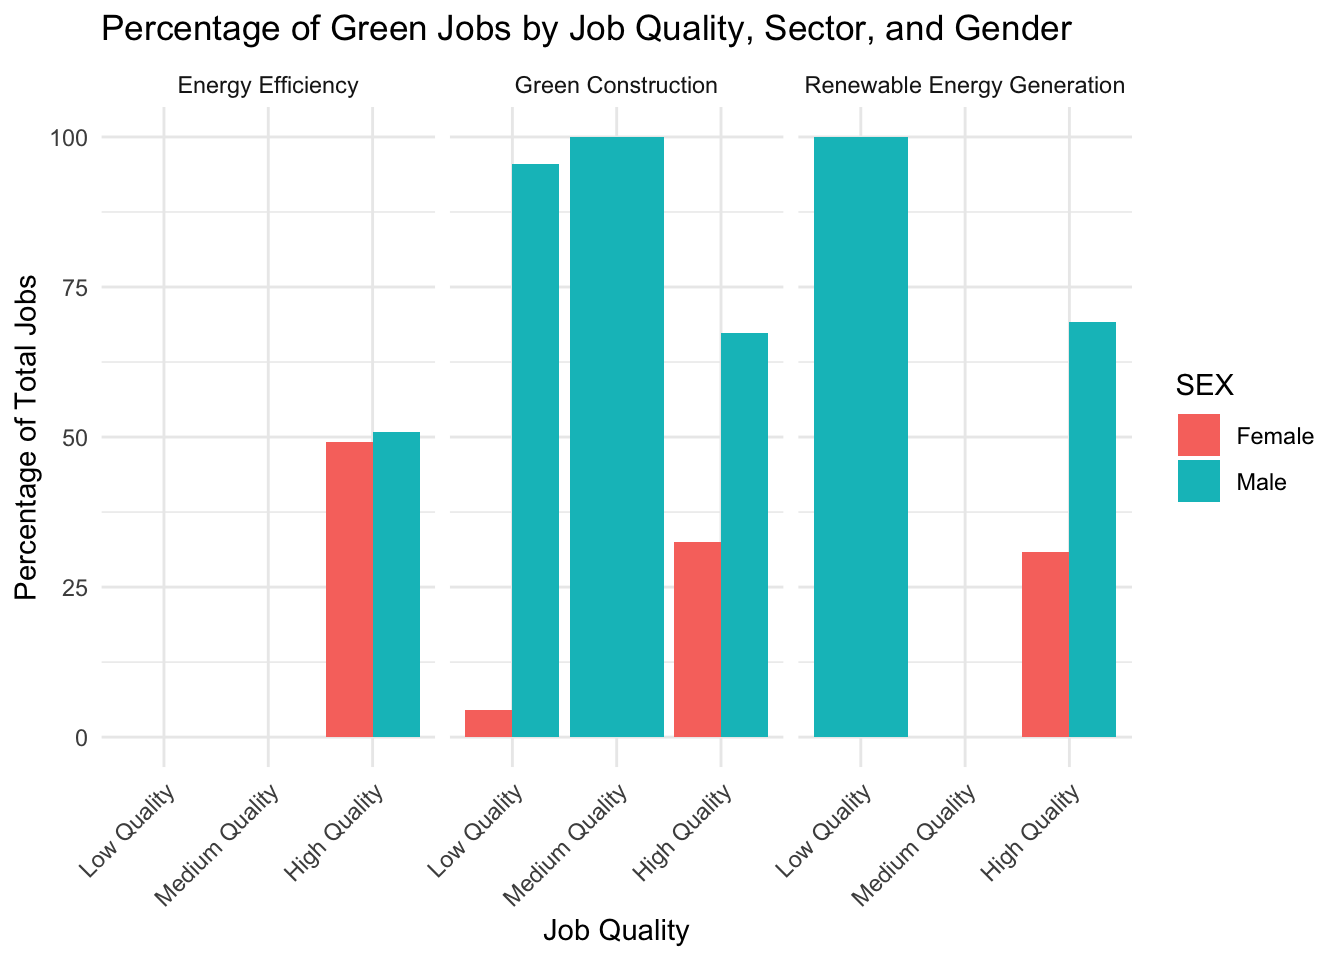

In [ ]:
# Bar plot for green jobs by sector and gender (percentage)
green_job_gender_percentage <- merged_green_jobs_data %>%
  group_by(`O*NET-SOC Sector`, SEX) %>%
  summarise(total_jobs = n()) %>%
  mutate(percentage_jobs = total_jobs / sum(total_jobs) * 100)

#### Income

(`stat_boxplot()`).

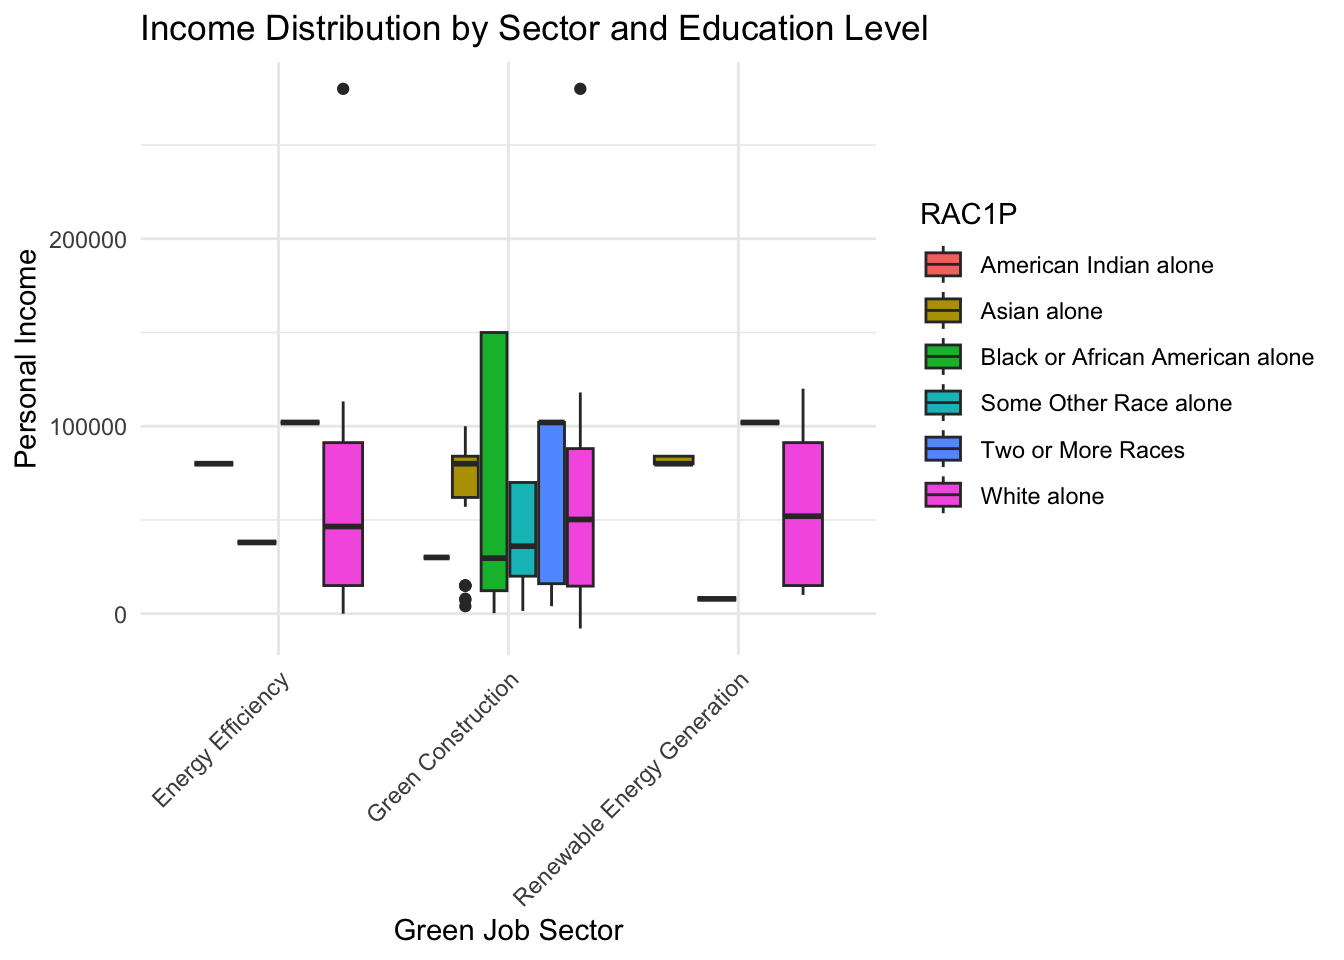

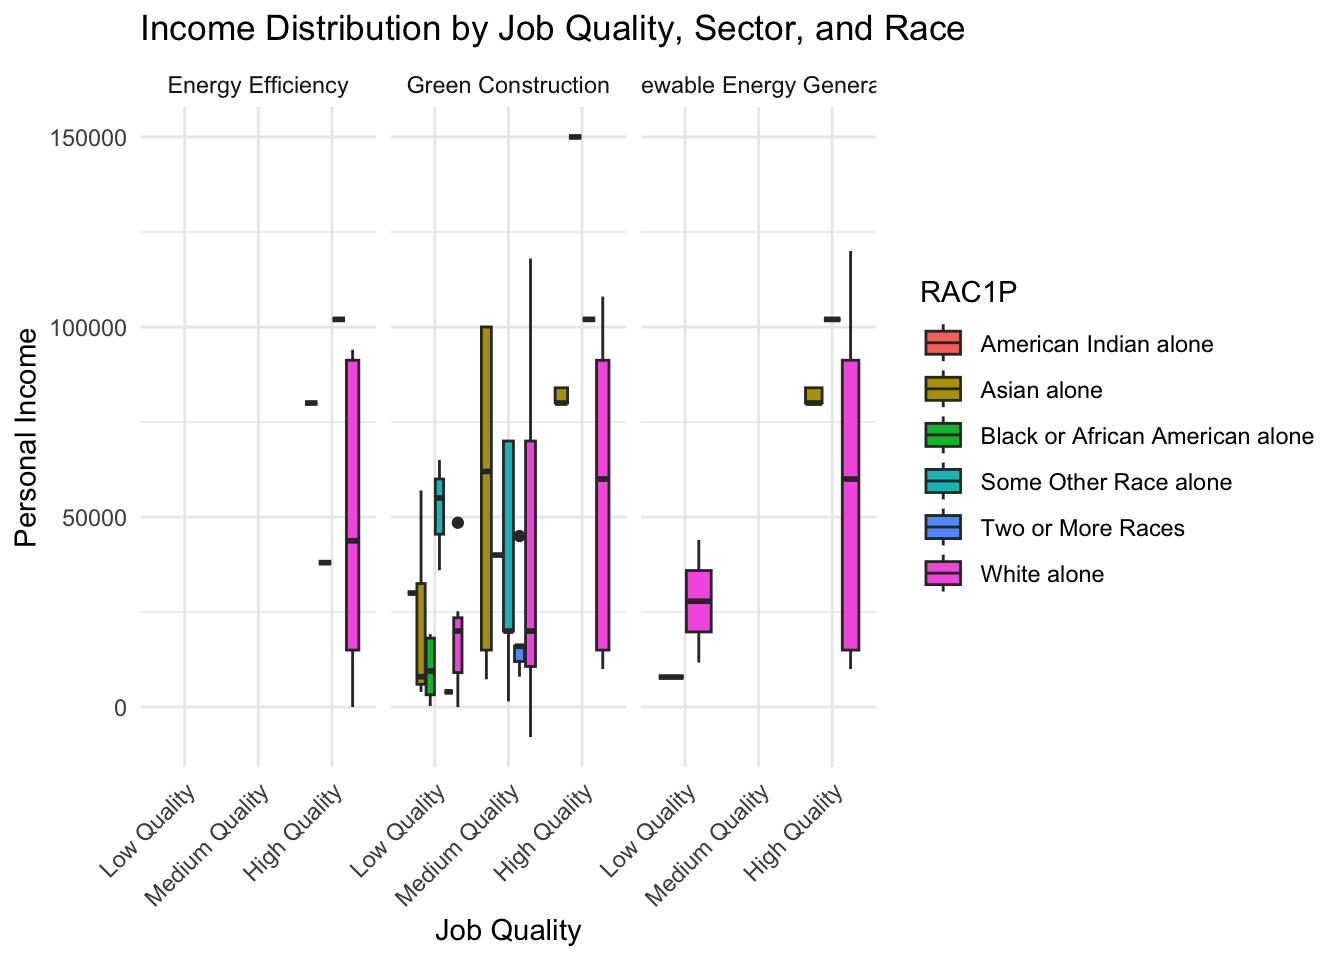

In [ ]:
# Box plot for income distribution by sector and education level
ggplot(merged_green_jobs_data, aes(x = `O*NET-SOC Sector`, y = PINCP, fill = RAC1P)) +
  geom_boxplot() +
  labs(title = "Income Distribution by Sector and Education Level",
       x = "Green Job Sector", y = "Personal Income") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))